**Estimation of Obesity Levels Based on Eating Habits and Physical Condition | HubbleMind**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

**Data Importing and Sanity check**

In [4]:
df=pd.read_csv(r'C:\Users\ASC\Desktop\res\JKUAT\ObesityDataSet_raw_and_data_sinthetic (1).csv')

In [5]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [6]:
df.shape

(2111, 17)

In [7]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [8]:
df.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
#Missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
#Checking for duplicates
df.duplicated().sum()

24

In [12]:
#Checking for garbage values
for column in df.select_dtypes(include="object").columns:
    print(f"Analyzing column: {column}")
    
    # Print value counts to understand the data
    print("Value counts:")
    print(df[column].value_counts())
    
    # Check for potential garbage values (e.g., anything that's not alphanumeric or space)
    print("\nChecking for garbage values:")
    garbage_values = df[column][~df[column].str.match(r'^[A-Za-z0-9\s]*$', na=False)]  # Regex for alphanumeric & spaces
    
    if not garbage_values.empty:
        print(f"Garbage values detected in column '{column}':")
        print(garbage_values.unique())
    else:
        print(f"No garbage values found in column '{column}'.")
    
    print("-" * 50)

Analyzing column: Gender
Value counts:
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Checking for garbage values:
No garbage values found in column 'Gender'.
--------------------------------------------------
Analyzing column: family_history_with_overweight
Value counts:
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

Checking for garbage values:
No garbage values found in column 'family_history_with_overweight'.
--------------------------------------------------
Analyzing column: FAVC
Value counts:
FAVC
yes    1866
no      245
Name: count, dtype: int64

Checking for garbage values:
No garbage values found in column 'FAVC'.
--------------------------------------------------
Analyzing column: CAEC
Value counts:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Checking for garbage values:
No garbage values found in column 'CAEC'.
-------------------------------------------------

**Handling Issues Detected in the Sanity Check**

In [14]:
#drop duplicates
df=df.drop_duplicates()

In [15]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2087 rows x 17 columns]

In [16]:
df.duplicated().sum()

0

**ADD A COLUMN FOR COMPUTING BMI**

In [18]:
# Adding BMI as a feature
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [19]:
df.head(3)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   

                  MTRANS     NObeyesdad        BMI  
0  Public_Transportation  Normal_Weight  24.386526  
1  Public_Transportation  Normal_Weight  24.238227  
2  Public_Transportation  Normal_Weight  23.765432

**EXPLORATORY DATA ANALYSIS**

In [21]:
#Descriptive statistics
df.describe().T

count       mean        std        min        25%        50%  \
Age     2087.0  24.353090   6.368801  14.000000  19.915937  22.847618   
Height  2087.0   1.702674   0.093186   1.450000   1.630178   1.701584   
Weight  2087.0  86.858730  26.190847  39.000000  66.000000  83.101100   
FCVC    2087.0   2.421466   0.534737   1.000000   2.000000   2.396265   
NCP     2087.0   2.701179   0.764614   1.000000   2.697467   3.000000   
CH2O    2087.0   2.004749   0.608284   1.000000   1.590922   2.000000   
FAF     2087.0   1.012812   0.853475   0.000000   0.124505   1.000000   
TUE     2087.0   0.663035   0.608153   0.000000   0.000000   0.630866   
BMI     2087.0  29.765758   8.024934  12.998685  24.368897  28.896224   

               75%         max  
Age      26.000000   61.000000  
Height    1.769491    1.980000  
Weight  108.015907  173.000000  
FCVC      3.000000    3.000000  
NCP       3.000000    4.000000  
CH2O      2.466193    3.000000  
FAF       1.678102    3.000000  
TUE       1.000000    2.000000  
BMI      36.095538   50.811753

In [22]:
#Descriptive Analysis of objects
df.describe(include='object')

Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2087                           2087  2087       2087  2087  2087   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1052                           1722  1844       1761  2043  1991   

             CALC                 MTRANS      NObeyesdad  
count        2087                   2087            2087  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1380                   1558             351

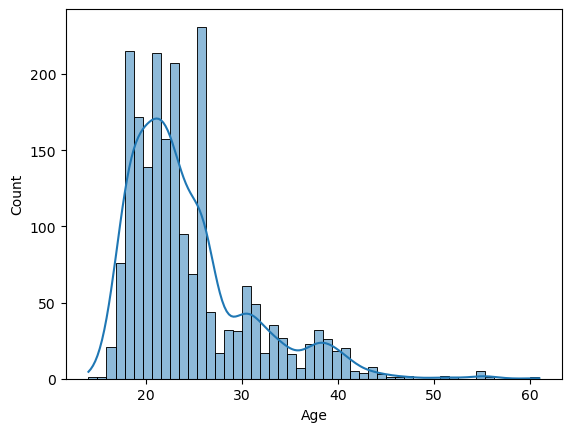

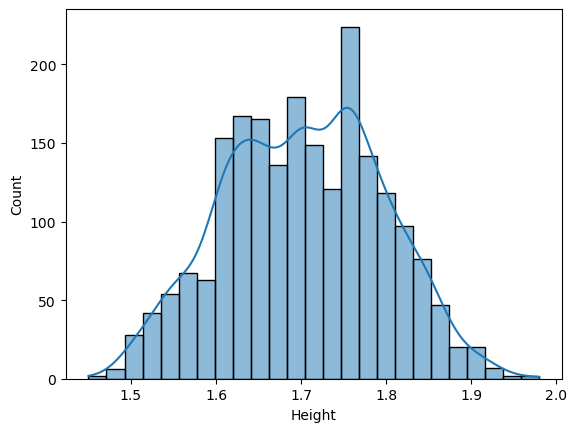

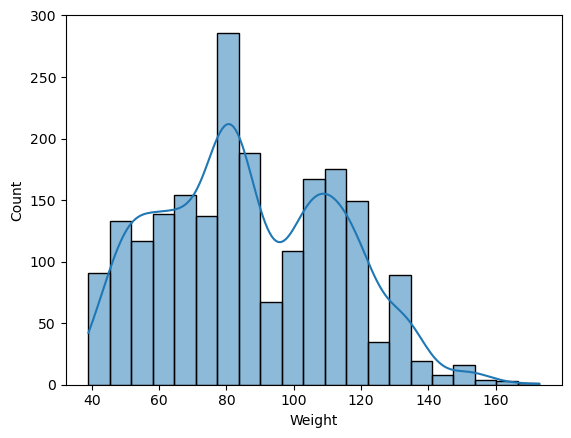

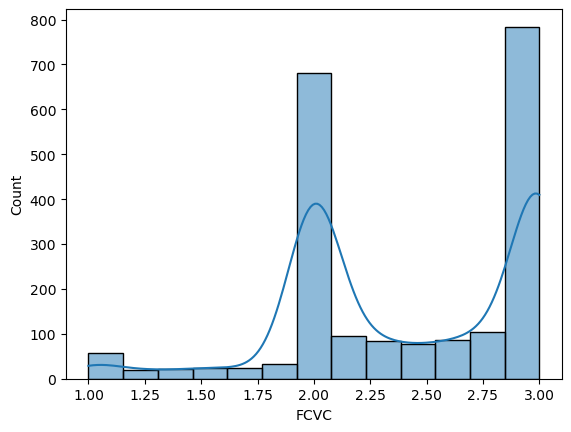

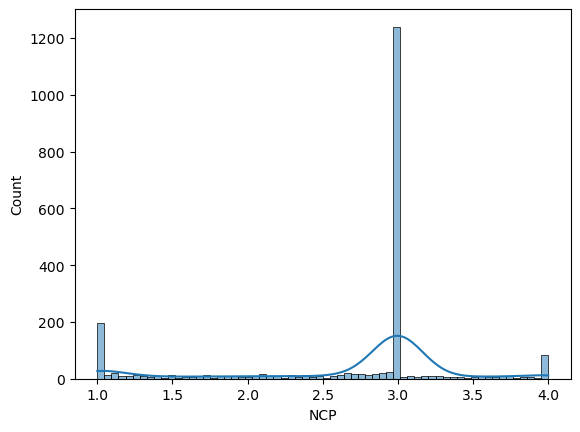

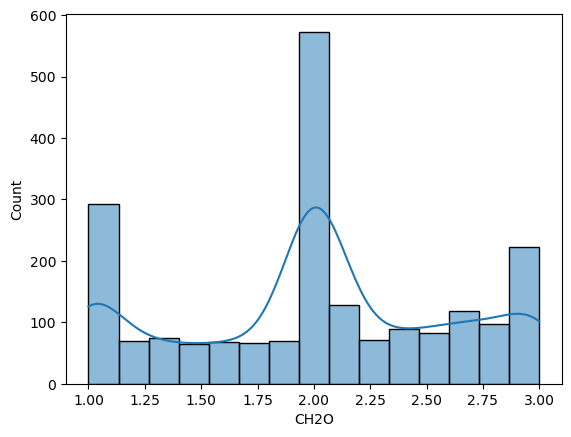

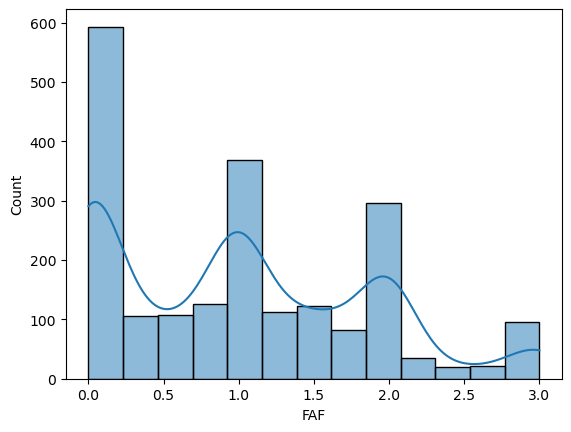

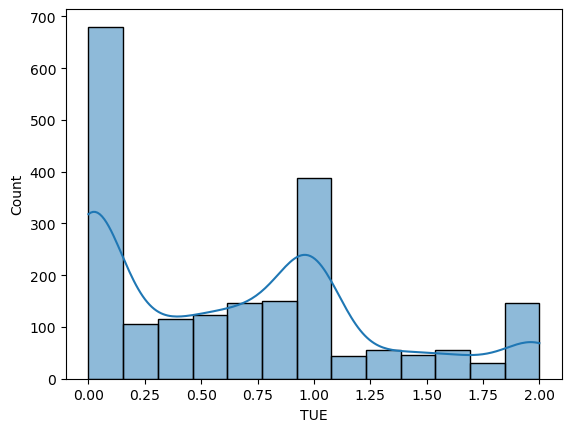

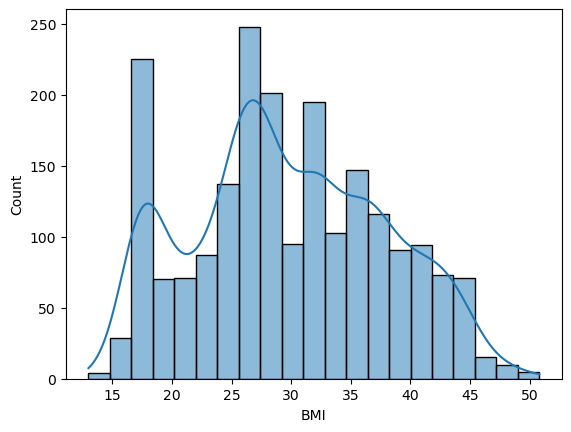

In [23]:
#Histogram to understand distribution of data
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

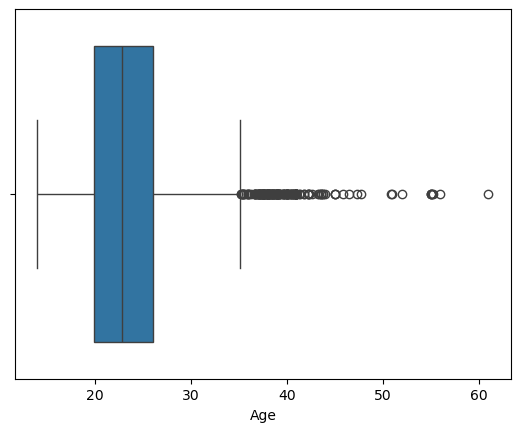

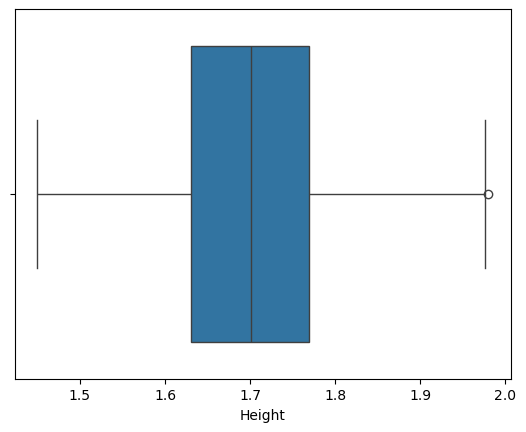

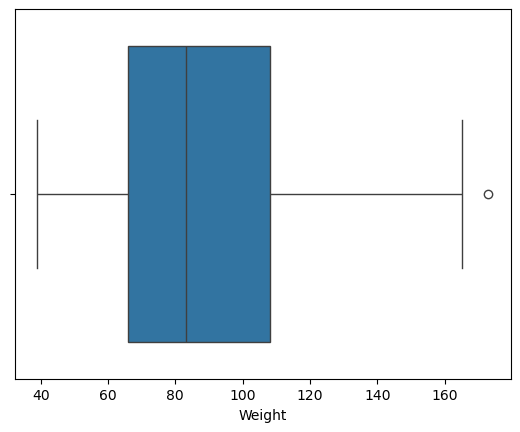

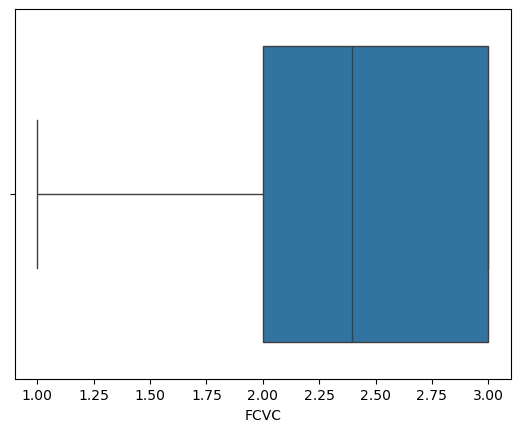

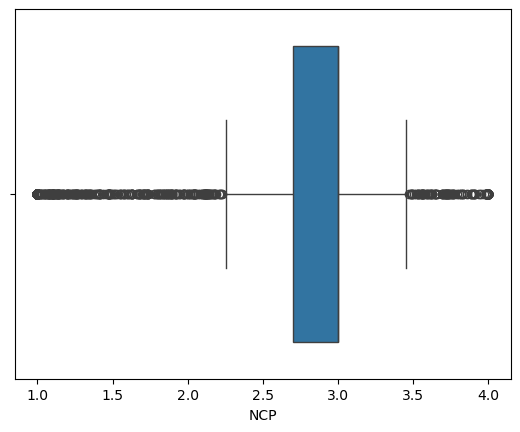

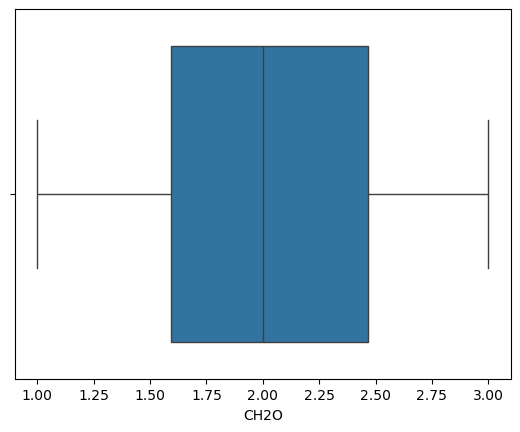

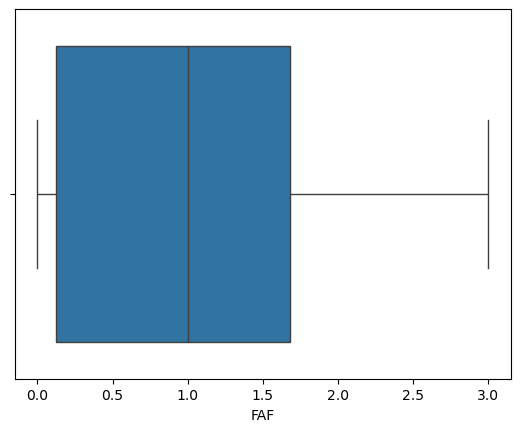

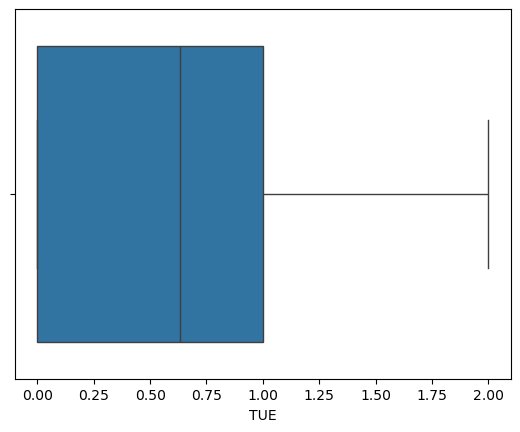

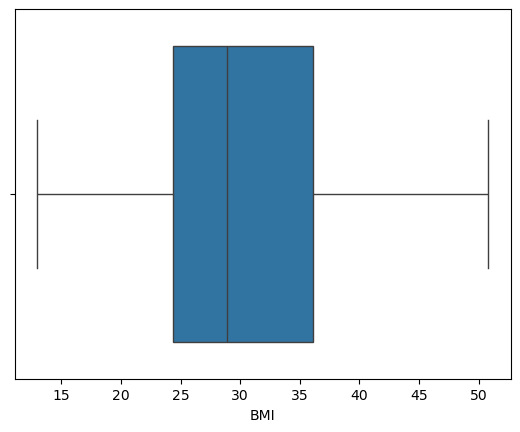

In [24]:
#Boxplot to identify outlier in the data
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

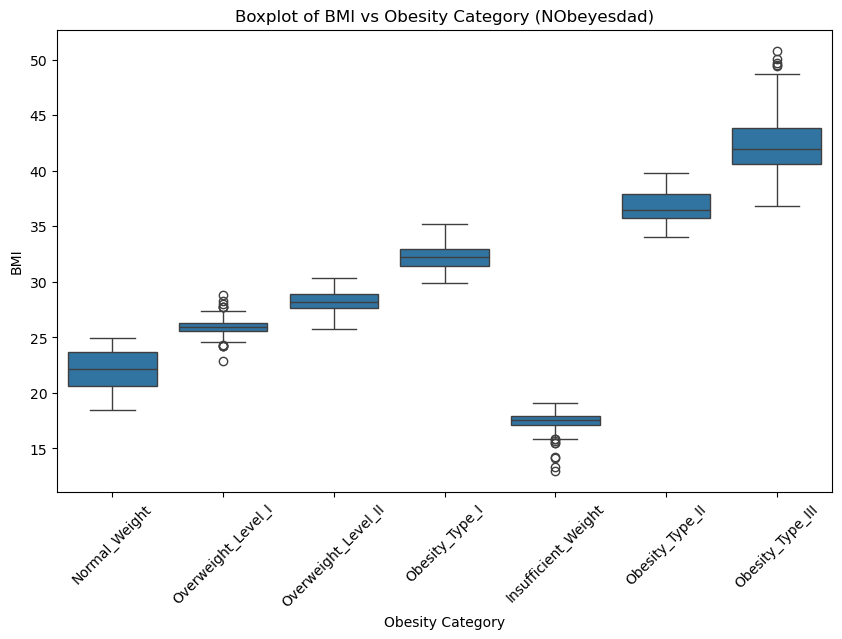

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='NObeyesdad', y='BMI')
plt.title('Boxplot of BMI vs Obesity Category (NObeyesdad)')
plt.xlabel('Obesity Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

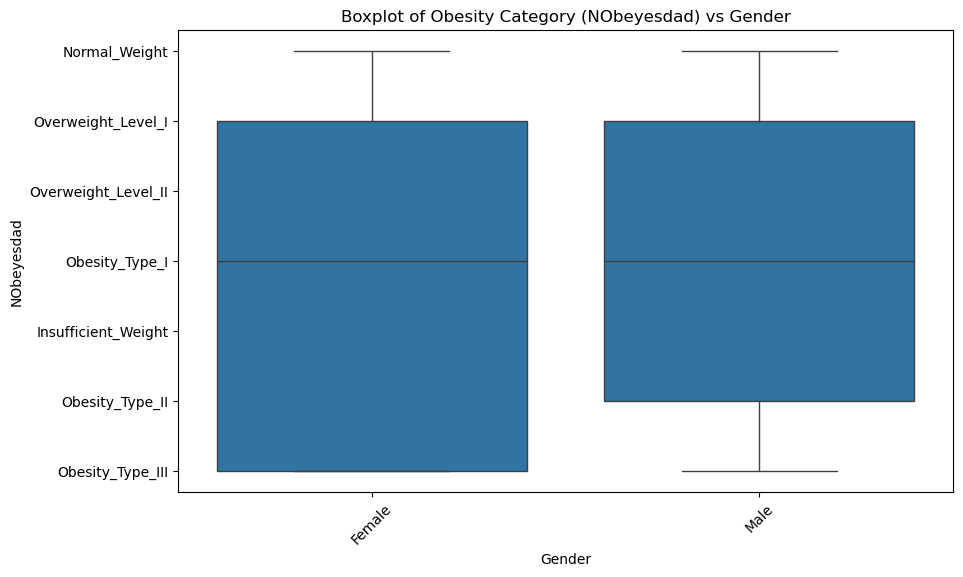

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='NObeyesdad', x='Gender')
plt.title('Boxplot of Obesity Category (NObeyesdad) vs Gender')
plt.xlabel('Gender')
plt.ylabel('NObeyesdad')
plt.xticks(rotation=45)
plt.show()

In [27]:
#Scatter plot to understands relationship between variables
df.select_dtypes(include='number').columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'], dtype='object')

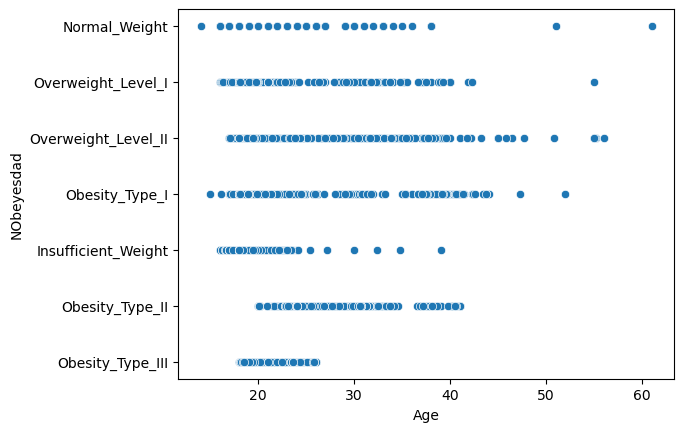

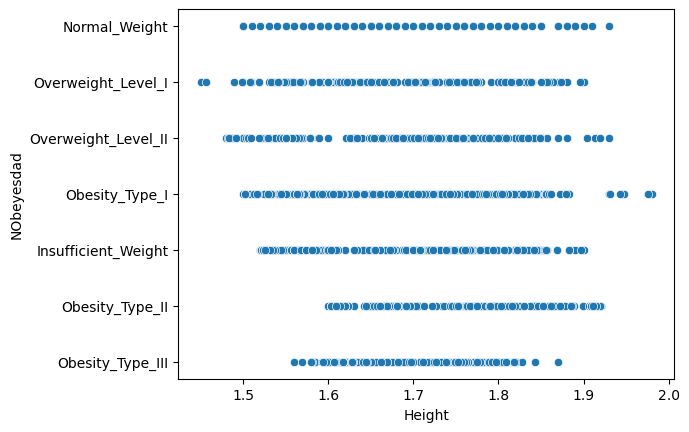

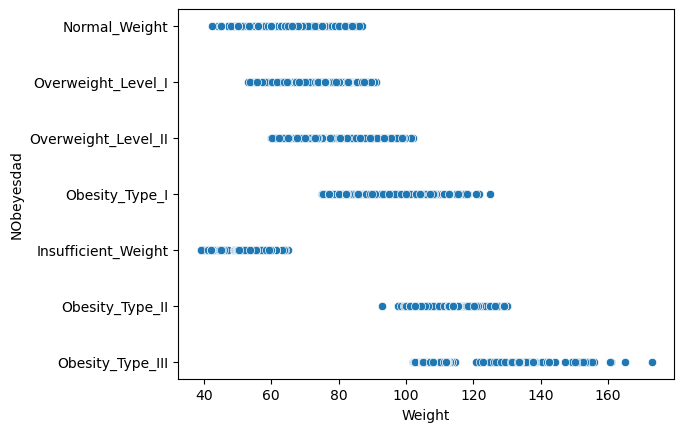

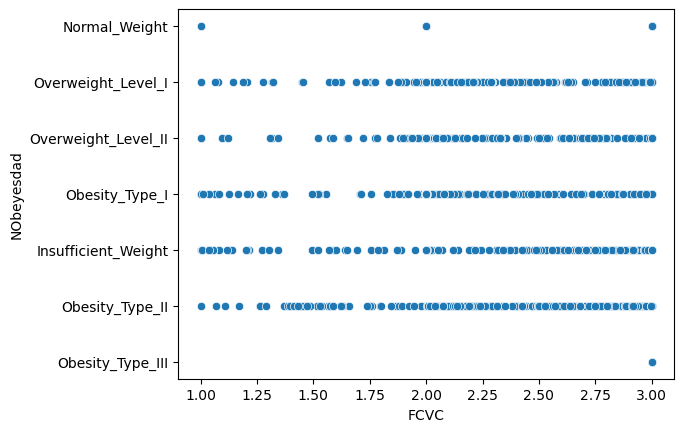

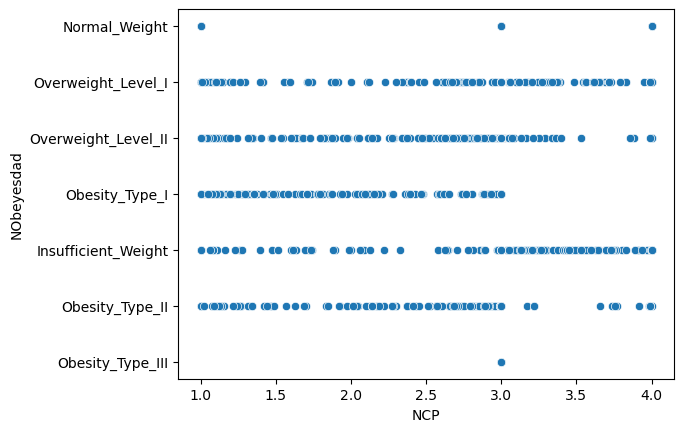

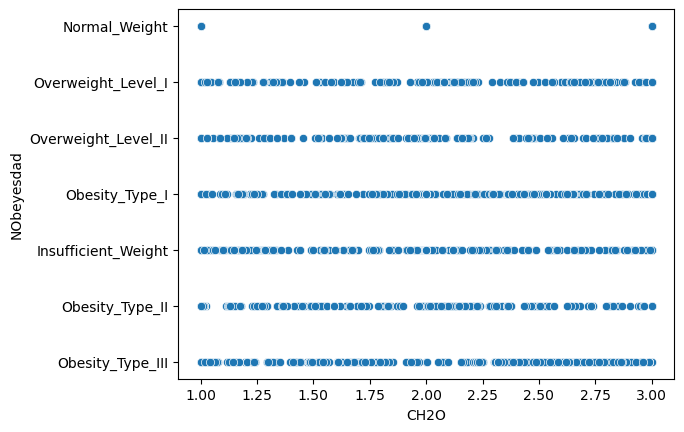

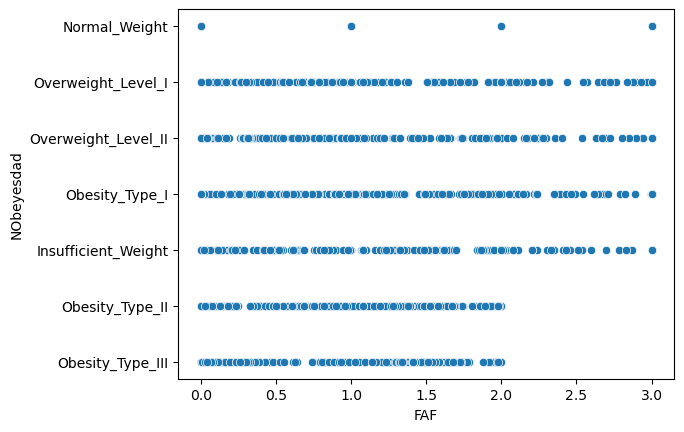

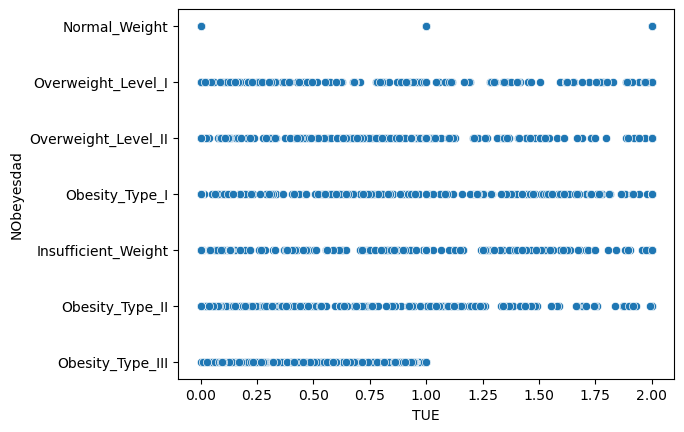

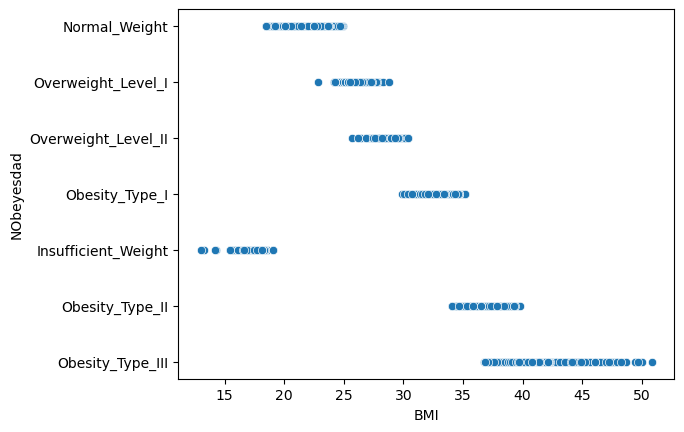

In [28]:
for i in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','BMI']:
     sns.scatterplot(data=df,x=i,y='NObeyesdad')
     plt.show()

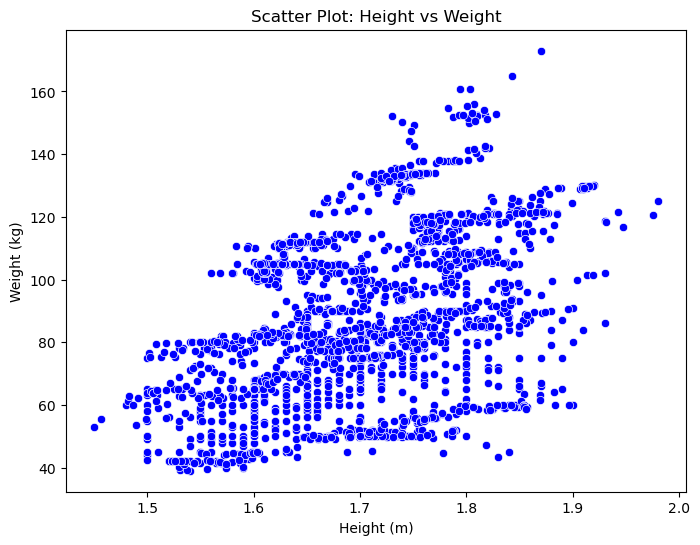

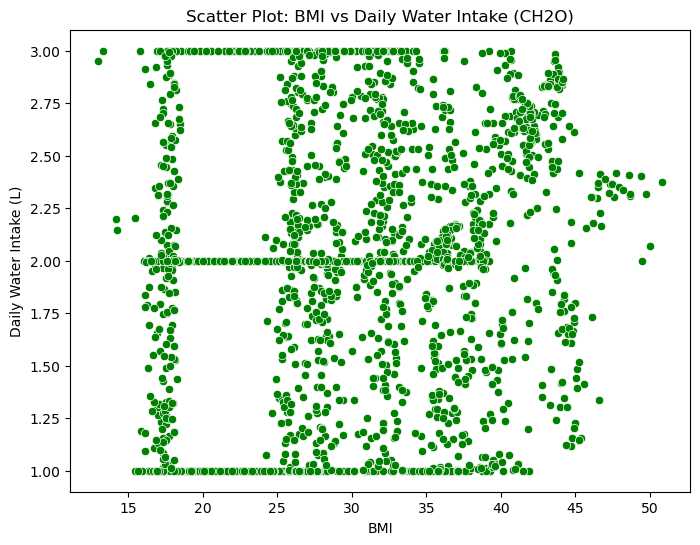

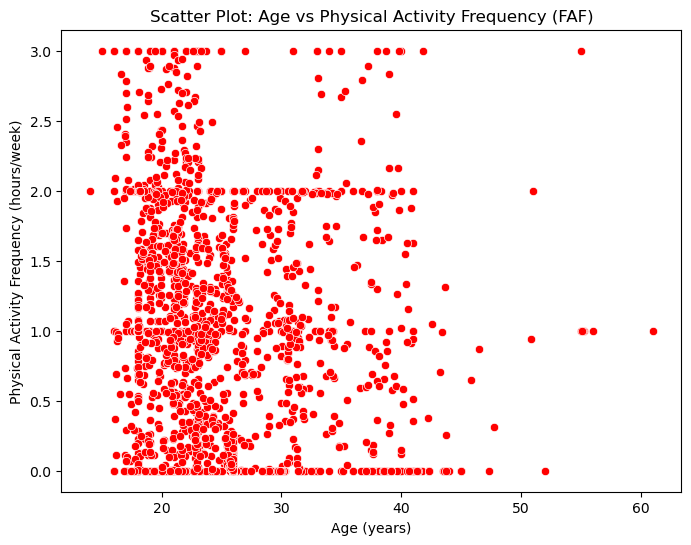

In [29]:
# Plot 1: Scatter plot between Height and Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight', color='blue')
plt.title('Scatter Plot: Height vs Weight')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

# Plot 2: Scatter plot between BMI and CH2O (Daily Water Intake)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='BMI', y='CH2O', color='green')
plt.title('Scatter Plot: BMI vs Daily Water Intake (CH2O)')
plt.xlabel('BMI')
plt.ylabel('Daily Water Intake (L)')
plt.show()

# Plot 3: Scatter plot between Age and FAF (Physical Activity Frequency)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='FAF', color='red')
plt.title('Scatter Plot: Age vs Physical Activity Frequency (FAF)')
plt.xlabel('Age (years)')
plt.ylabel('Physical Activity Frequency (hours/week)')
plt.show()

In [30]:
#Correlation with heatmap to interpret the relationship and multicolliarinity
df.select_dtypes(include='number').corr()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.031748  0.198160  0.013572 -0.055823 -0.044058 -0.148202   
Height -0.031748  1.000000  0.457468 -0.040363  0.227806  0.220487  0.293584   
Weight  0.198160  0.457468  1.000000  0.216574  0.092149  0.203823 -0.056490   
FCVC    0.013572 -0.040363  0.216574  1.000000  0.034885  0.081332  0.022003   
NCP    -0.055823  0.227806  0.092149  0.034885  1.000000  0.075335  0.127816   
CH2O   -0.044058  0.220487  0.203823  0.081332  0.075335  1.000000  0.165310   
FAF    -0.148202  0.293584 -0.056490  0.022003  0.127816  0.165310  1.000000   
TUE    -0.302927  0.041808 -0.079351 -0.104128  0.015693  0.020704  0.058716   
BMI     0.240769  0.124466  0.934494  0.265082  0.027936  0.144110 -0.182932   

             TUE       BMI  
Age    -0.302927  0.240769  
Height  0.041808  0.124466  
Weight -0.079351  0.934494  
FCVC   -0.104128  0.265082  
NCP     0.015693  0.027936  
CH2O    0.020704  0.144110  
FAF     0.058716 -0.182932  
TUE     1.000000 -0.105036  
BMI    -0.105036  1.000000

In [31]:
s=df.select_dtypes(include='number').corr()

<Axes: >

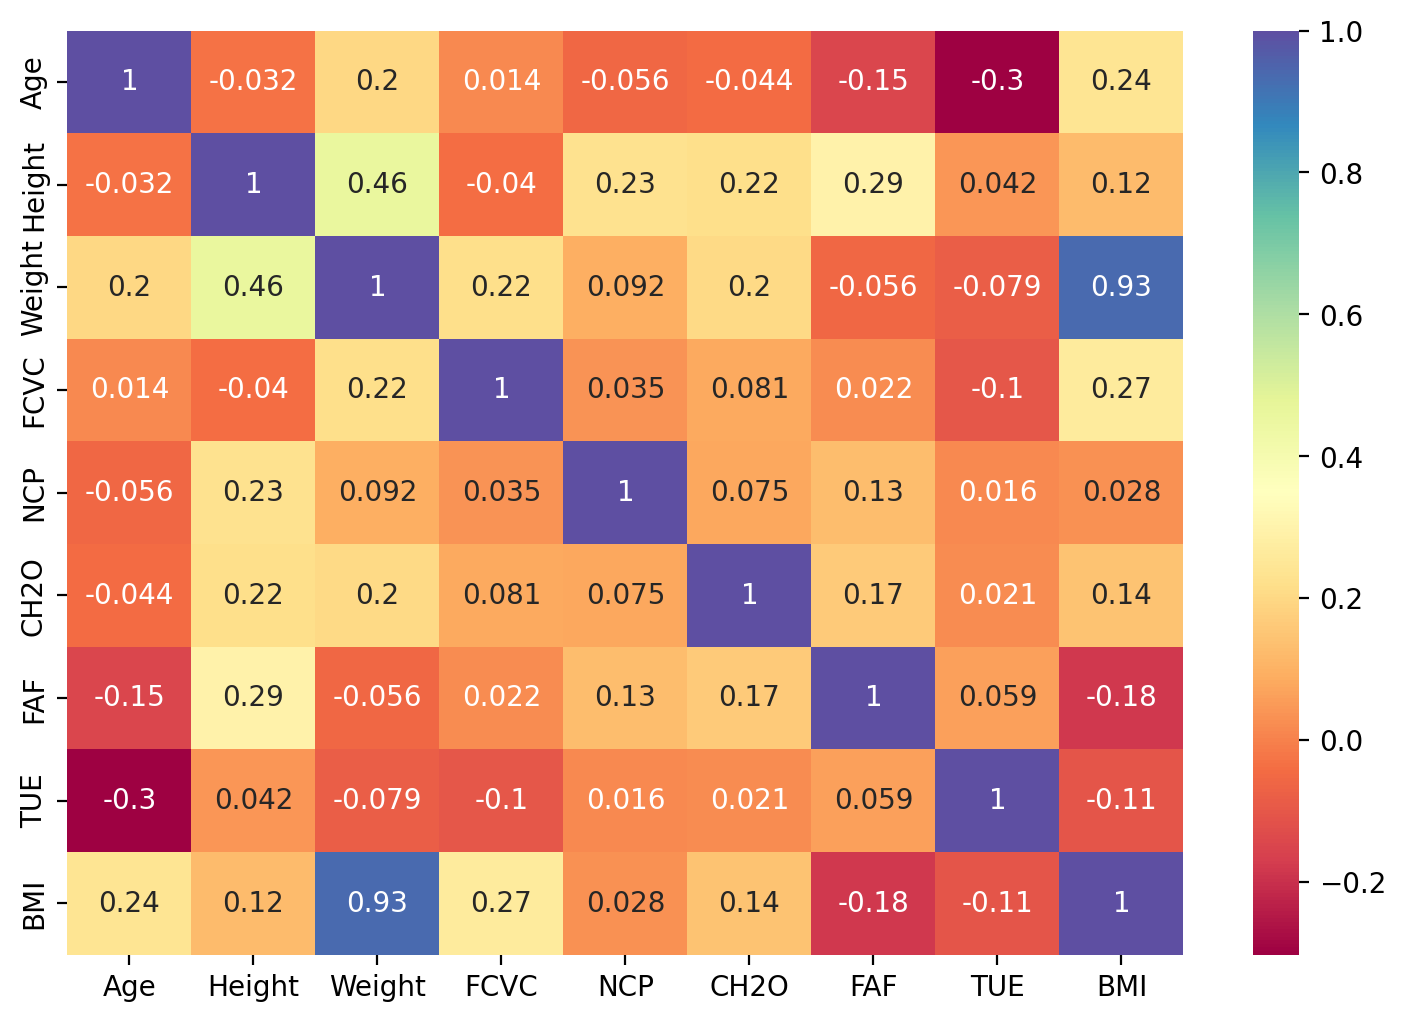

In [32]:
plt.figure(figsize=(9,6),dpi=200)
sns.heatmap(s,annot=True,cmap="Spectral")

**Visualizing Distribution of binary columns in my data set**

In [34]:
columns=['Gender','family_history_with_overweight','FAVC','SMOKE']

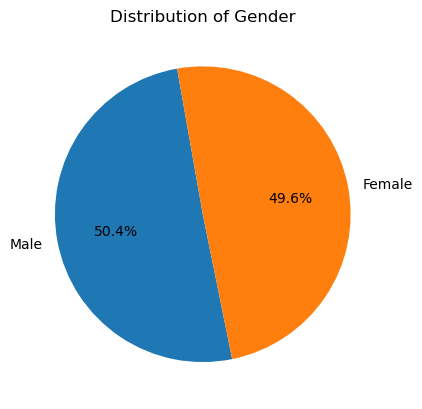

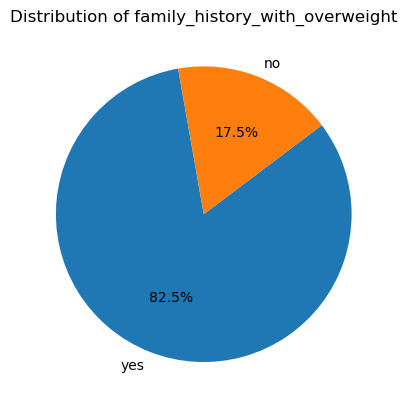

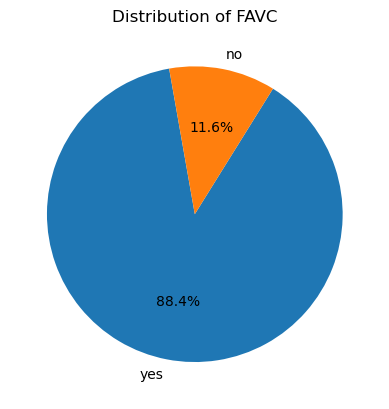

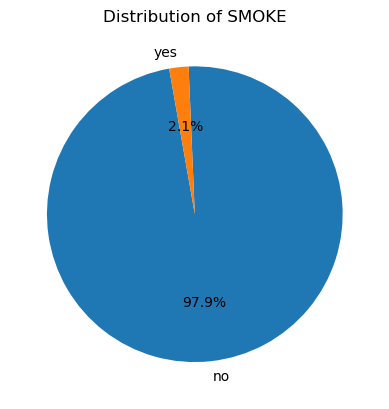

In [35]:
for column in columns:
    count=df[column].value_counts()
    plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
    plt.title(f'Distribution of {column}')
    plt.show()

**VISUALIZING DISTRIBUTION OF MULTICLASS CATEGORICAL VARIABLES**

In [37]:
columns=['CAEC','CALC','MTRANS','NObeyesdad']

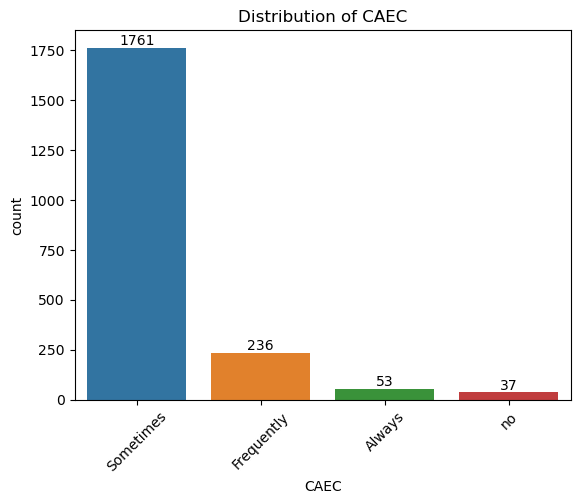

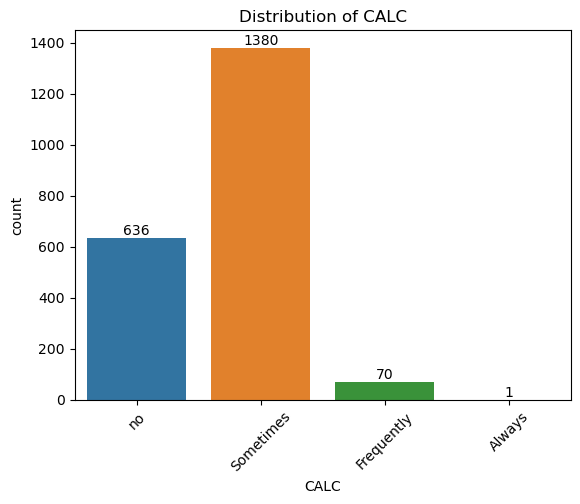

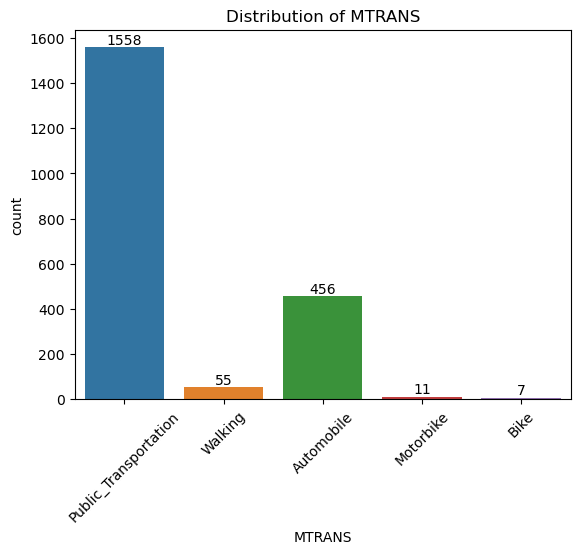

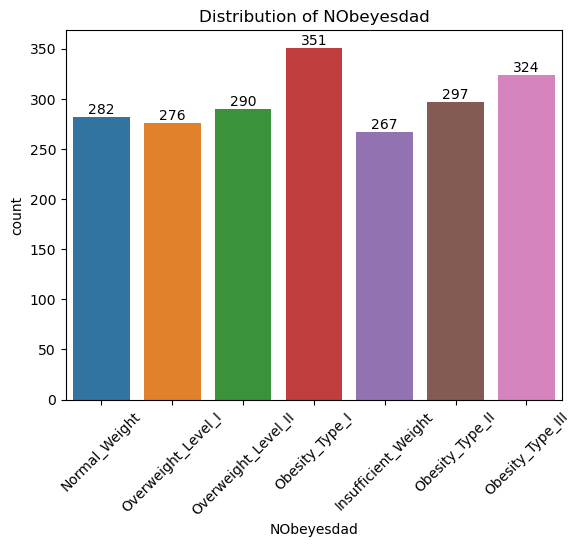

In [38]:
for column in columns:
    count=df[column].value_counts()
    ax=sns.countplot(data=df,x=column,hue=column)
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

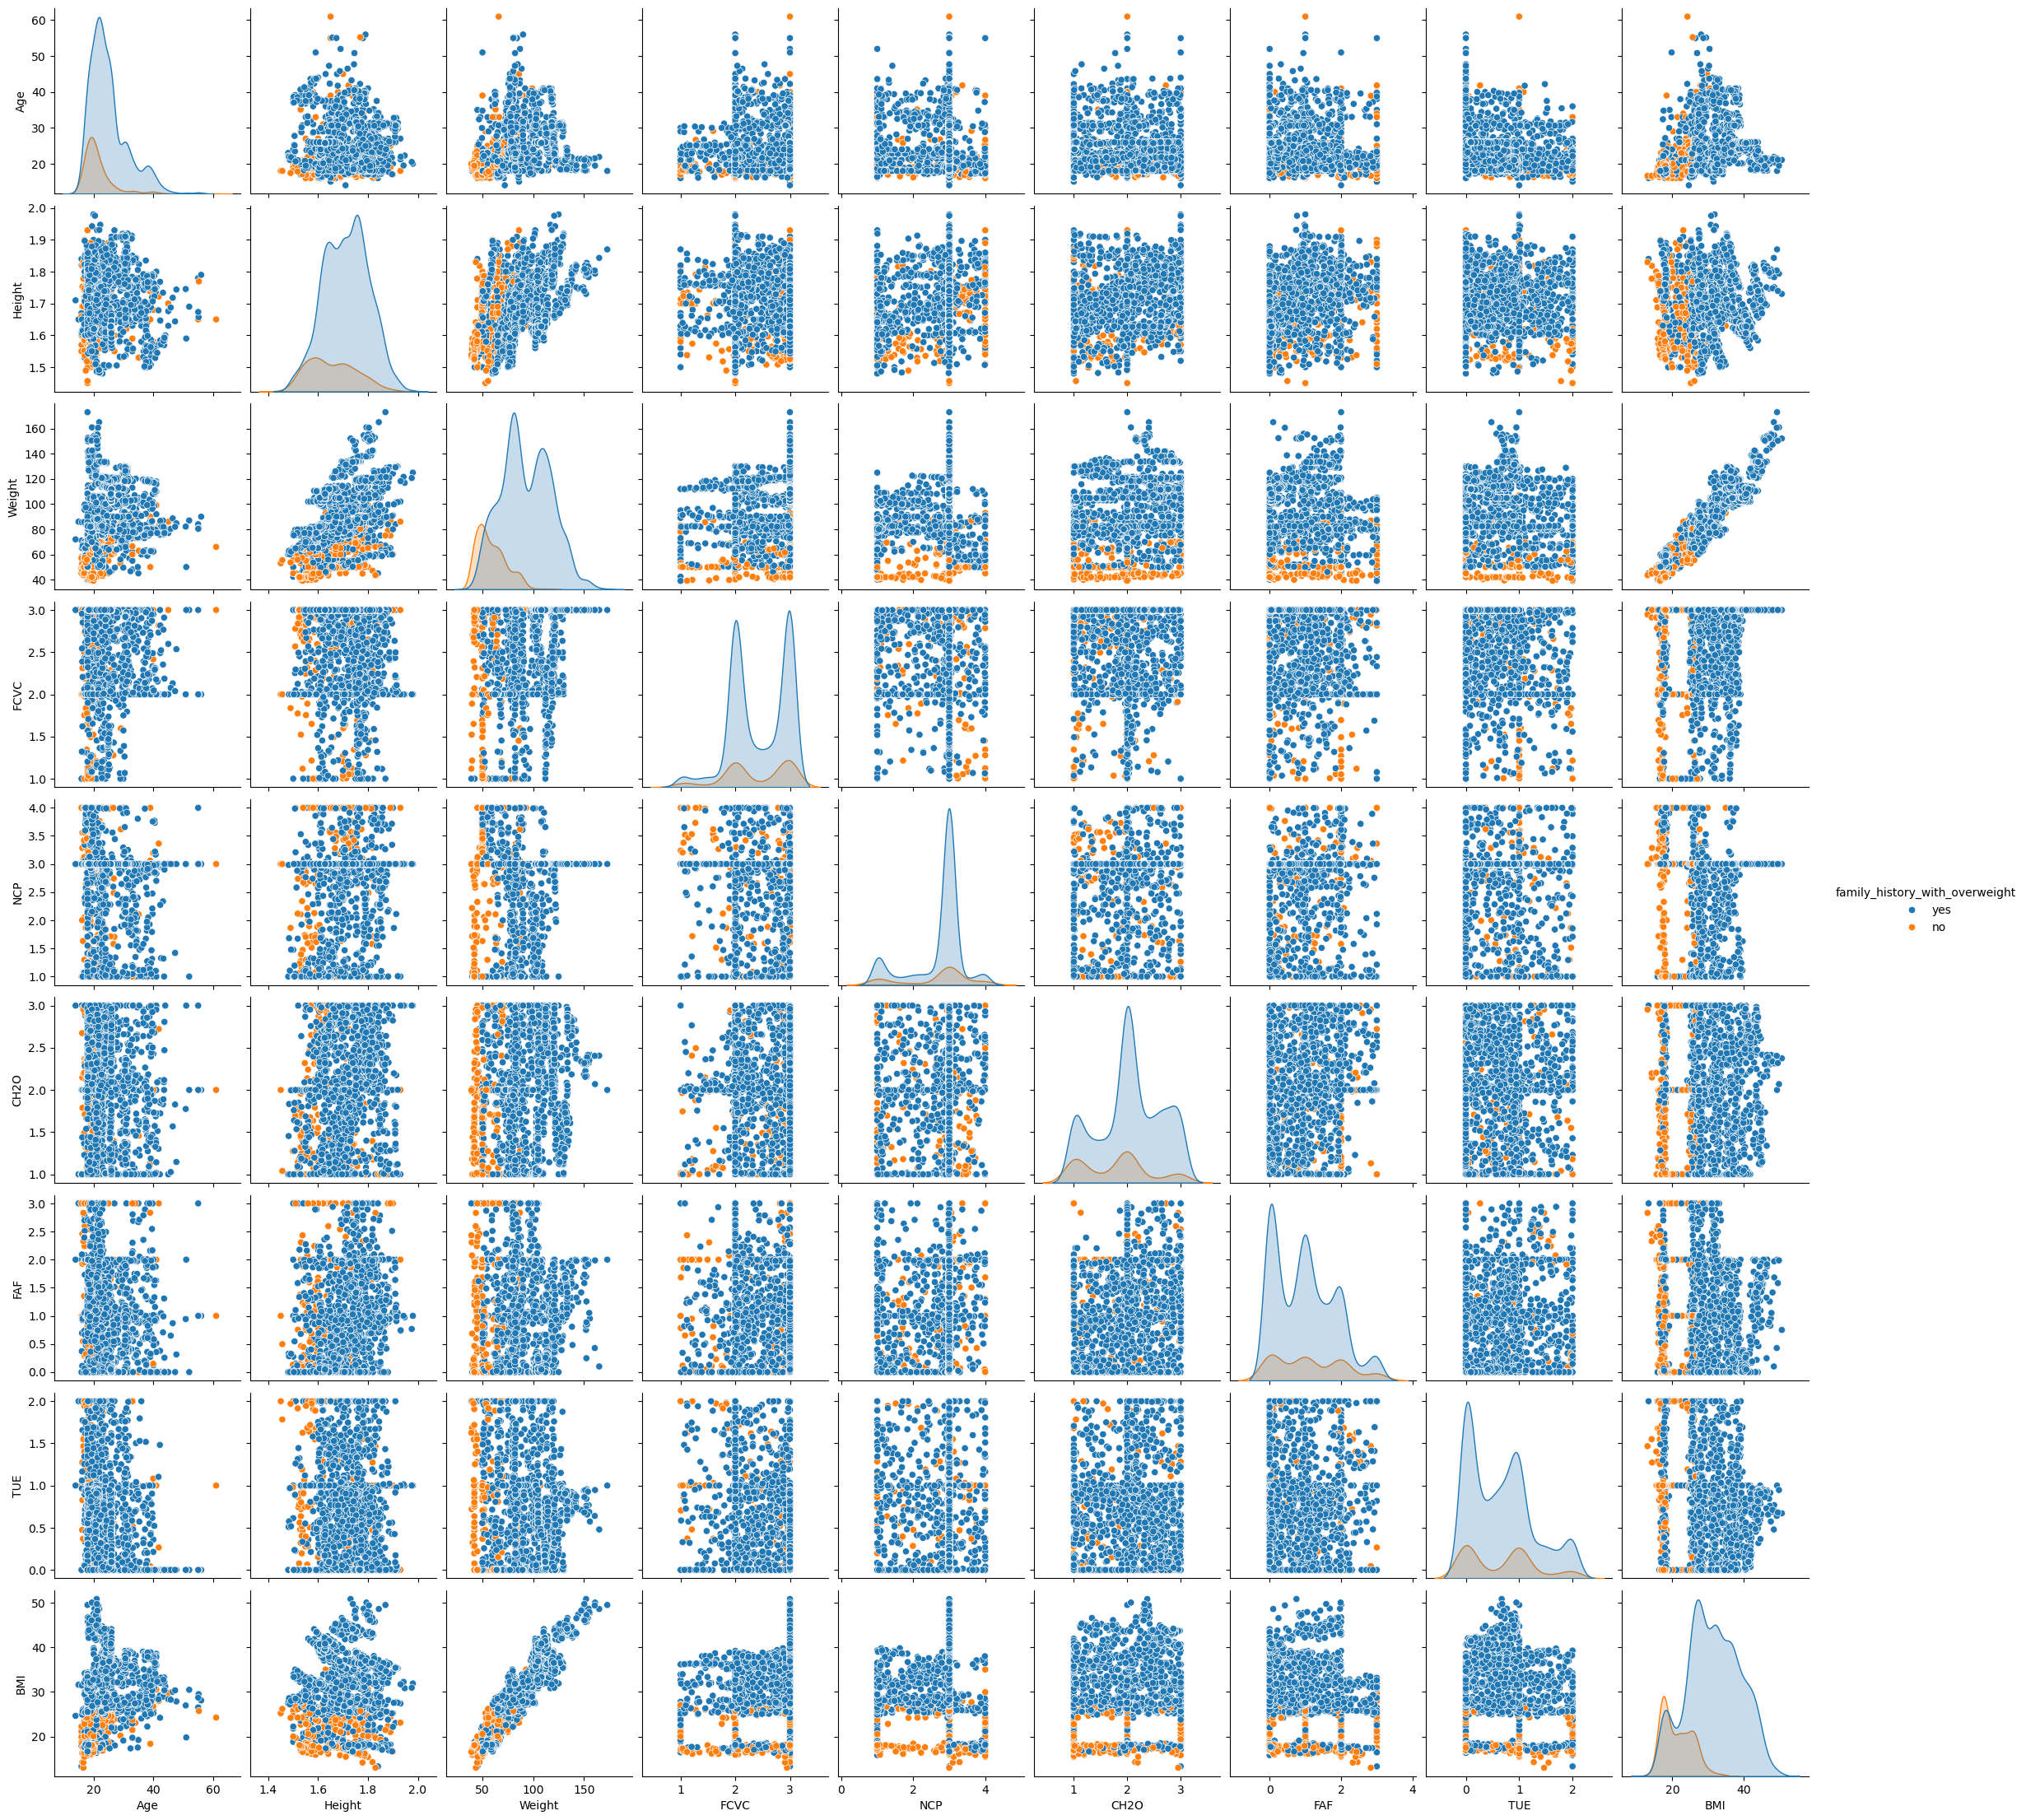

In [39]:
#Pairplot
sns.pairplot(data=df,hue='family_history_with_overweight')

**HANDLING OUTLIERS**

In [41]:
#Log transformation-Weight,height

df['Weight']=np.log10(df['Weight'])
df['Height']=np.log10(df['Height'])

In [42]:
df.head(3)

Gender   Age    Height    Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0  0.209515  1.806180                            yes   no   2.0   
1  Female  21.0  0.181844  1.748188                            yes   no   3.0   
2    Male  23.0  0.255273  1.886491                            yes   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   

                  MTRANS     NObeyesdad        BMI  
0  Public_Transportation  Normal_Weight  24.386526  
1  Public_Transportation  Normal_Weight  24.238227  
2  Public_Transportation  Normal_Weight  23.765432

In [43]:
#Capping-Age

Q1 = df['Age'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Age'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1 

lower_limit = Q1 - 1.5 * IQR       # Lower bound
upper_limit = Q3 + 1.5 * IQR       # Upper bound

df.loc[df['Age'] > upper_limit, 'Age'] = upper_limit
df.loc[df['Age'] < lower_limit, 'Age'] = lower_limit

In [44]:
#PLOTS AFTER HANDLING OUTLIERS**

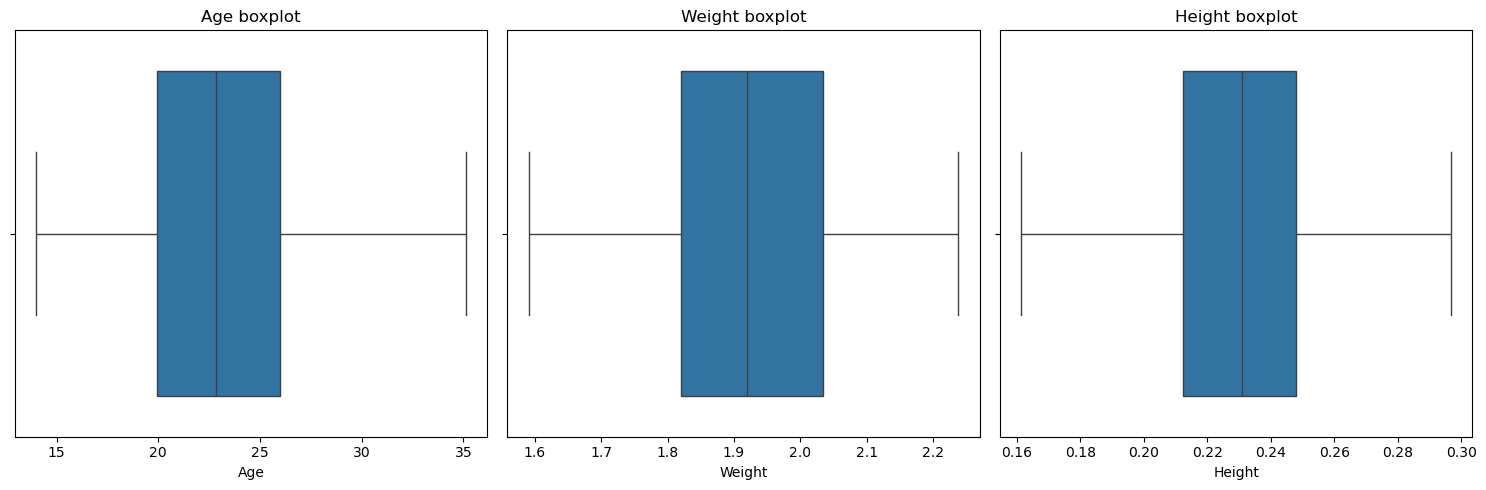

In [45]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x=df['Age'],ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_title('Age boxplot')

sns.boxplot(x=df['Weight'],ax=axes[1])
axes[1].set_xlabel('Weight')
axes[1].set_title('Weight boxplot')

sns.boxplot(x=df['Height'],ax=axes[2])
axes[2].set_title('Height boxplot')
plt.tight_layout()


**LABEL ENCODING FOR BINARY VARIABLES**

In [47]:
edf=df.copy()

In [48]:
edf.head(3)

Gender   Age    Height    Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0  0.209515  1.806180                            yes   no   2.0   
1  Female  21.0  0.181844  1.748188                            yes   no   3.0   
2    Male  23.0  0.255273  1.886491                            yes   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   

                  MTRANS     NObeyesdad        BMI  
0  Public_Transportation  Normal_Weight  24.386526  
1  Public_Transportation  Normal_Weight  24.238227  
2  Public_Transportation  Normal_Weight  23.765432

In [49]:
edf.select_dtypes(include='object').head(3)

Gender family_history_with_overweight FAVC       CAEC SMOKE  SCC  \
0  Female                            yes   no  Sometimes    no   no   
1  Female                            yes   no  Sometimes   yes  yes   
2    Male                            yes   no  Sometimes    no   no   

         CALC                 MTRANS     NObeyesdad  
0          no  Public_Transportation  Normal_Weight  
1   Sometimes  Public_Transportation  Normal_Weight  
2  Frequently  Public_Transportation  Normal_Weight

In [50]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [51]:
edf['Gender']=lbl.fit_transform(edf['Gender'])
edf['family_history_with_overweight']=lbl.fit_transform(edf['family_history_with_overweight'])
edf['FAVC']=lbl.fit_transform(edf['FAVC'])
edf['SMOKE']=lbl.fit_transform(edf['SMOKE'])
edf['SCC']=lbl.fit_transform(edf['SCC'])

In [52]:
edf[['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']].head(3)

Gender  family_history_with_overweight  FAVC  SMOKE  SCC
0       0                               1     0      0    0
1       0                               1     0      1    1
2       1                               1     0      0    0

**ONE HOT ENCODING MULTICLASS VARIABLES**

In [54]:
edf.select_dtypes(include='object').head(4)

CAEC        CALC                 MTRANS          NObeyesdad
0  Sometimes          no  Public_Transportation       Normal_Weight
1  Sometimes   Sometimes  Public_Transportation       Normal_Weight
2  Sometimes  Frequently  Public_Transportation       Normal_Weight
3  Sometimes  Frequently                Walking  Overweight_Level_I

In [55]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [56]:
encoder

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [57]:
columns_to_encode=['CAEC','CALC','MTRANS','NObeyesdad']
encoder_df=encoder.fit_transform(df[columns_to_encode])

In [58]:
encoder_df

CAEC_Always  CAEC_Frequently  CAEC_Sometimes  CAEC_no  CALC_Always  \
0             0.0              0.0             1.0      0.0          0.0   
1             0.0              0.0             1.0      0.0          0.0   
2             0.0              0.0             1.0      0.0          0.0   
3             0.0              0.0             1.0      0.0          0.0   
4             0.0              0.0             1.0      0.0          0.0   
...           ...              ...             ...      ...          ...   
2106          0.0              0.0             1.0      0.0          0.0   
2107          0.0              0.0             1.0      0.0          0.0   
2108          0.0              0.0             1.0      0.0          0.0   
2109          0.0              0.0             1.0      0.0          0.0   
2110          0.0              0.0             1.0      0.0          0.0   

      CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  \
0                 0.0             0.0      1.0                0.0   
1                 0.0             1.0      0.0                0.0   
2                 1.0             0.0      0.0                0.0   
3                 1.0             0.0      0.0                0.0   
4                 0.0             1.0      0.0                0.0   
...               ...             ...      ...                ...   
2106              0.0             1.0      0.0                0.0   
2107              0.0             1.0      0.0                0.0   
2108              0.0             1.0      0.0                0.0   
2109              0.0             1.0      0.0                0.0   
2110              0.0             1.0      0.0                0.0   

      MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0             0.0               0.0                           1.0   
1             0.0               0.0                           1.0   
2             0.0               0.0                           1.0   
3             0.0               0.0                           0.0   
4             0.0               0.0                           1.0   
...           ...               ...                           ...   
2106          0.0               0.0                           1.0   
2107          0.0               0.0                           1.0   
2108          0.0               0.0                           1.0   
2109          0.0               0.0                           1.0   
2110          0.0               0.0                           1.0   

      MTRANS_Walking  NObeyesdad_Insufficient_Weight  \
0                0.0                             0.0   
1                0.0                             0.0   
2                0.0                             0.0   
3                1.0                             0.0   
4                0.0                             0.0   
...              ...                             ...   
2106             0.0                             0.0   
2107             0.0                             0.0   
2108             0.0                             0.0   
2109             0.0                             0.0   
2110             0.0                             0.0   

      NObeyesdad_Normal_Weight  NObeyesdad_Obesity_Type_I  \
0                          1.0                        0.0   
1                          1.0                        0.0   
2                          1.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
...                        ...                        ...   
2106                       0.0                        0.0   
2107                       0.0                        0.0   
2108                       0.0                        0.0   
2109                       0.0                        0.0   
2110                       0.0                        0.0   

      NObeyesdad_Obesity_Type

In [59]:
encoded=pd.concat([edf,encoder_df],axis=1).drop(['CAEC','CALC','MTRANS','NObeyesdad'],axis=1)

In [60]:
encoded.head(3)

Gender   Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  21.0  0.209515  1.806180                               1     0   
1       0  21.0  0.181844  1.748188                               1     0   
2       1  23.0  0.255273  1.886491                               1     0   

   FCVC  NCP  SMOKE  CH2O  ...  MTRANS_Motorbike  \
0   2.0  3.0      0   2.0  ...               0.0   
1   3.0  3.0      1   3.0  ...               0.0   
2   2.0  3.0      0   2.0  ...               0.0   

   MTRANS_Public_Transportation  MTRANS_Walking  \
0                           1.0             0.0   
1                           1.0             0.0   
2                           1.0             0.0   

   NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight  \
0                             0.0                       1.0   
1                             0.0                       1.0   
2                             0.0                       1.0   

   NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   

   NObeyesdad_Obesity_Type_III  NObeyesdad_Overweight_Level_I  \
0                          0.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            0.0   

   NObeyesdad_Overweight_Level_II  
0                             0.0  
1                             0.0  
2                             0.0  

[3 rows x 34 columns]

In [61]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int32  
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int32  
 5   FAVC                            2087 non-null   int32  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SMOKE                           2087 non-null   int32  
 9   CH2O                            2087 non-null   float64
 10  SCC                             2087 non-null   int32  
 11  FAF                             2087 non-null   float64
 12  TUE                             2087 no

In [62]:
encoded.corr()

Gender       Age    Height    Weight  \
Gender                          1.000000  0.070110  0.626763  0.210027   
Age                             0.070110  1.000000 -0.008928  0.289745   
Height                          0.626763 -0.008928  1.000000  0.461093   
Weight                          0.210027  0.289745  0.461093  1.000000   
family_history_with_overweight  0.113492  0.233588  0.235977  0.538619   
FAVC                            0.061220  0.077752  0.183719  0.278330   
FCVC                           -0.271575  0.027886 -0.038703  0.177381   
NCP                             0.077863 -0.065098  0.230703  0.074108   
SMOKE                           0.045501  0.079650  0.050612  0.021894   
CH2O                            0.095129 -0.040420  0.222766  0.206061   
SCC                            -0.102435 -0.140410 -0.140534 -0.214192   
FAF                             0.189471 -0.161974  0.293189 -0.068429   
TUE                             0.022356 -0.300999  0.044292 -0.090004   
BMI                            -0.054737  0.284135  0.128410  0.929259   
CAEC_Always                     0.020006 -0.046520  0.001666 -0.093028   
CAEC_Frequently                -0.117901 -0.136593 -0.117610 -0.417801   
CAEC_Sometimes                  0.085336  0.156062  0.126699  0.436543   
CAEC_no                         0.024323 -0.046085 -0.068307 -0.087427   
CALC_Always                     0.021717 -0.012184 -0.000027 -0.016777   
CALC_Frequently                 0.035742  0.058330  0.044442 -0.025393   
CALC_Sometimes                 -0.041754  0.030913  0.111376  0.230332   
CALC_no                         0.027919 -0.054022 -0.131902 -0.226102   
MTRANS_Automobile               0.139482  0.604242  0.071745  0.016999   
MTRANS_Bike                     0.057541 -0.000818  0.028837 -0.018454   
MTRANS_Motorbike                0.045731  0.015983 -0.012277 -0.032388   
MTRANS_Public_Transportation   -0.163790 -0.550086 -0.083220  0.026262   
MTRANS_Walking                  0.043530 -0.071859  0.036056 -0.093868   
NObeyesdad_Insufficient_Weight -0.104975 -0.302942 -0.038701 -0.620126   
NObeyesdad_Normal_Weight        0.007994 -0.177682 -0.110142 -0.372709   
NObeyesdad_Obesity_Type_I       0.046300  0.088194 -0.044173  0.152915   
NObeyesdad_Obesity_Type_II      0.398544  0.299878  0.300016  0.424172   
NObeyesdad_Obesity_Type_III    -0.429553 -0.036744 -0.063629  0.503888   
NObeyesdad_Overweight_Level_I  -0.022983 -0.054148 -0.048802 -0.139184   
NObeyesdad_Overweight_Level_II  0.113092  0.161388  0.005378 -0.017838   

                                family_history_with_overweight      FAVC  \
Gender                                                0.113492  0.061220   
Age                                                   0.233588  0.077752   
Height                                                0.235977  0.183719   
Weight                                                0.538619  0.278330   
family_history_with_overweight                        1.000000  0.214329   
FAVC                                                  0.214329  1.000000   
FCVC                                                  0.033199 -0.025419   
NCP                                                   0.028411 -0.006398   
SMOKE                                                 0.014885 -0.050713   
CH2O                                                  0.168627  0.002993   
SCC                                                  -0.193947 -0.191277   
FAF                                                  -0.062937 -0.111184   
TUE                                                   0.002314  0.071505   
BMI                                                   0.483648  0.247368   
CAEC_Always                                          -0.078017 -0.055350   
CAEC_Frequently                                      -0.273727 -0.181711   
CAEC_Sometimes                                        0.316112  0.201799   
CAEC_no                                              -0.119756 -0.053114   

<Axes: >

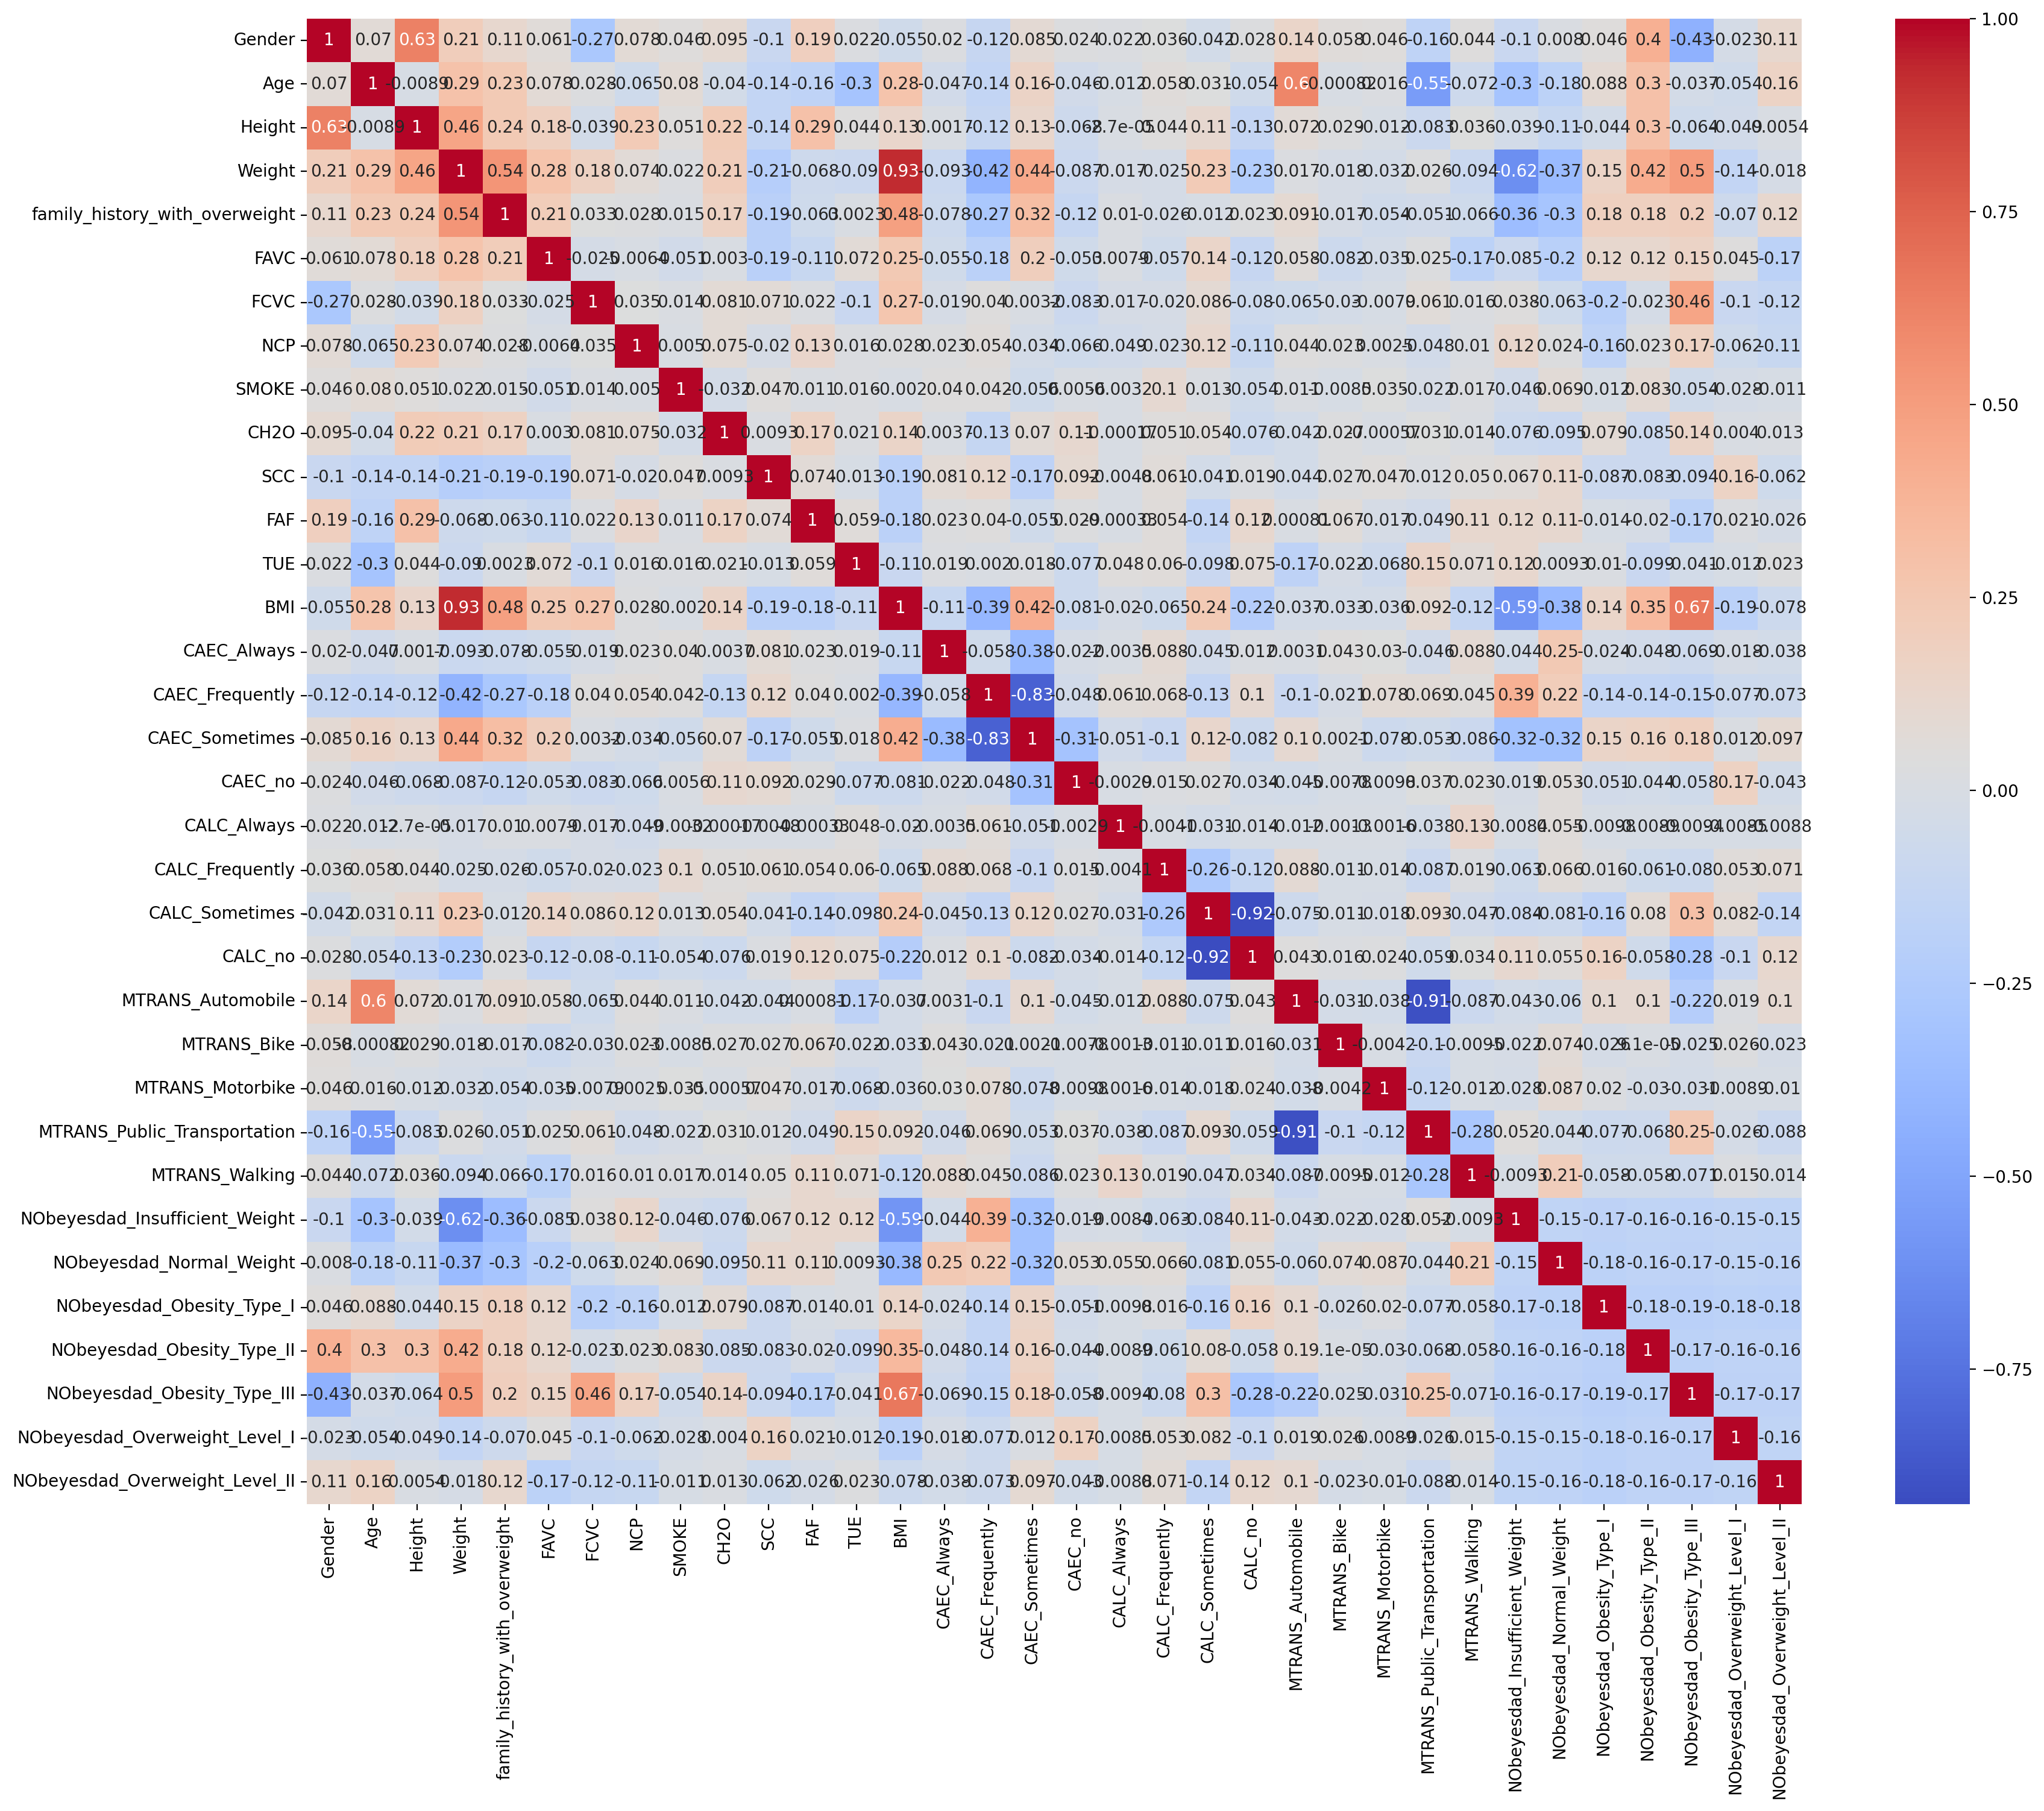

In [63]:
s=encoded.corr()
plt.figure(figsize=(20,16),dpi=200)
sns.heatmap(s,annot=True,cmap="coolwarm")

In [64]:
y=encoded[['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight','NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II','NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
'NObeyesdad_Overweight_Level_II']]

In [65]:
X=encoded[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'BMI','CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no','MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike','MTRANS_Public_Transportation', 'MTRANS_Walking']]

**DATA SPLITTING**

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [68]:
X_train

Gender        Age    Height    Weight  family_history_with_overweight  \
2030       0  20.796266  0.254436  2.183195                               1   
1836       0  20.891491  0.242619  2.125721                               1   
360        1  20.000000  0.271842  1.875061                               0   
2007       0  25.999174  0.214372  2.020403                               1   
880        0  18.947102  0.181534  1.780083                               0   
...      ...        ...       ...       ...                             ...   
610        0  21.798856  0.223238  1.698805                               1   
1623       1  29.509151  0.248136  2.051041                               1   
1385       0  35.126094  0.196291  1.913384                               1   
1571       1  35.126094  0.243075  2.072642                               1   
884        0  18.985119  0.245295  1.903090                               1   

      FAVC      FCVC       NCP  SMOKE      CH2O  ...  CAEC_no  CALC_Always  \
2030     1  3.000000  3.000000      0  2.322003  ...      0.0          0.0   
1836     1  3.000000  3.000000      0  2.874336  ...      0.0          0.0   
360      1  2.000000  3.000000      0  1.000000  ...      0.0          0.0   
2007     1  3.000000  3.000000      0  2.654636  ...      0.0          0.0   
880      1  2.838037  2.737571      0  1.144467  ...      0.0          0.0   
...    ...       ...       ...    ...       ...  ...      ...          ...   
610      1  2.979383  3.000000      0  2.975887  ...      0.0          0.0   
1623     1  2.303041  3.000000      0  2.065817  ...      0.0          0.0   
1385     1  2.522183  1.326982      0  1.872673  ...      0.0          0.0   
1571     1  2.092830  3.000000      0  2.077704  ...      0.0          0.0   
884      1  2.000000  1.411808      0  2.651194  ...      0.0          0.0   

      CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  \
2030              0.0             1.0      0.0                0.0   
1836              0.0             1.0      0.0                0.0   
360               0.0             1.0      0.0                0.0   
2007              0.0             1.0      0.0                0.0   
880               0.0             1.0      0.0                0.0   
...               ...             ...      ...                ...   
610               0.0             0.0      1.0                0.0   
1623              0.0             1.0      0.0                1.0   
1385              0.0             0.0      1.0                1.0   
1571              0.0             1.0      0.0                1.0   
884               0.0             0.0      1.0                0.0   

      MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
2030          0.0               0.0                           1.0   
1836          0.0               0.0                           1.0   
360           0.0               0.0                           1.0   
2007          0.0               0.0                           1.0   
880           0.0               0.0                           1.0   
...           ...               ...                           ...   
610           0.0               0.0                           1.0   
1623          0.0               0.0                           0.0   
1385          0.0               0.0                           0.0   
1571          0.0               0.0                           0.0   
884           0.0               0.0                           1.0   

      MTRANS_Walking  
2030             0.0  
1836             0.0  
360              0.0  
2007             0.0  
880              0.0  
...              ...  
610              0.0  
1623             0.0  
1385             0.0  
1571             0.0  
884              0.0  

[1669 rows x 27 columns]

In [69]:
X_test

Gender        Age    Height    Weight  family_history_with_overweight  \
556        1  18.000000  0.250796  1.706459                               0   
765        0  30.958957  0.213117  1.837612                               1   
542        0  19.633898  0.220328  1.690549                               0   
1584       1  30.577343  0.271591  2.097133                               1   
992        0  20.707680  0.195866  1.843503                               1   
...      ...        ...       ...       ...                             ...   
1801       0  18.233541  0.253430  2.139437                               1   
159        1  27.000000  0.214844  1.892095                               1   
260        1  21.000000  0.235528  1.875061                               0   
148        0  27.000000  0.204120  1.785330                               0   
344        1  18.000000  0.271842  2.238046                               1   

      FAVC      FCVC  NCP  SMOKE      CH2O  ...  CAEC_no  CALC_Always  \
556      1  2.052932  3.0      0  2.000000  ...      0.0          0.0   
765      1  2.052152  3.0      0  1.972074  ...      0.0          0.0   
542      0  2.750715  3.0      0  2.000000  ...      0.0          0.0   
1584     1  2.050619  3.0      1  1.515183  ...      0.0          0.0   
992      0  2.417635  3.0      0  1.937674  ...      0.0          0.0   
...    ...       ...  ...    ...       ...  ...      ...          ...   
1801     1  3.000000  3.0      0  2.838893  ...      0.0          0.0   
159      1  2.000000  1.0      0  2.000000  ...      0.0          0.0   
260      1  2.000000  3.0      0  1.000000  ...      0.0          0.0   
148      1  3.000000  3.0      0  2.000000  ...      0.0          0.0   
344      1  3.000000  3.0      0  2.000000  ...      0.0          0.0   

      CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  \
556               0.0             1.0      0.0                0.0   
765               0.0             1.0      0.0                1.0   
542               0.0             1.0      0.0                0.0   
1584              0.0             1.0      0.0                0.0   
992               0.0             0.0      1.0                0.0   
...               ...             ...      ...                ...   
1801              0.0             1.0      0.0                0.0   
159               1.0             0.0      0.0                1.0   
260               0.0             0.0      1.0                0.0   
148               0.0             1.0      0.0                1.0   
344               0.0             1.0      0.0                0.0   

      MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
556           0.0               0.0                           1.0   
765           0.0               0.0                           0.0   
542           0.0               0.0                           1.0   
1584          0.0               0.0                           1.0   
992           0.0               0.0                           1.0   
...           ...               ...                           ...   
1801          0.0               0.0                           1.0   
159           0.0               0.0                           0.0   
260           0.0               0.0                           1.0   
148           0.0               0.0                           0.0   
344           0.0               0.0                           1.0   

      MTRANS_Walking  
556              0.0  
765              0.0  
542              0.0  
1584             0.0  
992              0.0  
...              ...  
1801             0.0  
159              0.0  
260              0.0  
148              0.0  
344              0.0  

[418 rows x 27 columns]

In [70]:
y_train

NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight  \
2030                             0.0                       0.0   
1836                             0.0                       0.0   
360                              0.0                       1.0   
2007                             0.0                       0.0   
880                              0.0                       0.0   
...                              ...                       ...   
610                              1.0                       0.0   
1623                             0.0                       0.0   
1385                             0.0                       0.0   
1571                             0.0                       0.0   
884                              0.0                       0.0   

      NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
2030                        0.0                         0.0   
1836                        0.0                         0.0   
360                         0.0                         0.0   
2007                        0.0                         0.0   
880                         0.0                         0.0   
...                         ...                         ...   
610                         0.0                         0.0   
1623                        0.0                         1.0   
1385                        1.0                         0.0   
1571                        0.0                         1.0   
884                         0.0                         0.0   

      NObeyesdad_Obesity_Type_III  NObeyesdad_Overweight_Level_I  \
2030                          1.0                            0.0   
1836                          1.0                            0.0   
360                           0.0                            0.0   
2007                          1.0                            0.0   
880                           0.0                            1.0   
...                           ...                            ...   
610                           0.0                            0.0   
1623                          0.0                            0.0   
1385                          0.0                            0.0   
1571                          0.0                            0.0   
884                           0.0                            1.0   

      NObeyesdad_Overweight_Level_II  
2030                             0.0  
1836                             0.0  
360                              0.0  
2007                             0.0  
880                              0.0  
...                              ...  
610                              0.0  
1623                             0.0  
1385                             0.0  
1571                             0.0  
884                              0.0  

[1669 rows x 7 columns]

In [71]:
y_test

NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight  \
556                              1.0                       0.0   
765                              0.0                       0.0   
542                              1.0                       0.0   
1584                             0.0                       0.0   
992                              0.0                       0.0   
...                              ...                       ...   
1801                             0.0                       0.0   
159                              0.0                       0.0   
260                              0.0                       0.0   
148                              0.0                       1.0   
344                              0.0                       0.0   

      NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
556                         0.0                         0.0   
765                         0.0                         0.0   
542                         0.0                         0.0   
1584                        0.0                         1.0   
992                         0.0                         0.0   
...                         ...                         ...   
1801                        0.0                         0.0   
159                         0.0                         0.0   
260                         0.0                         0.0   
148                         0.0                         0.0   
344                         0.0                         0.0   

      NObeyesdad_Obesity_Type_III  NObeyesdad_Overweight_Level_I  \
556                           0.0                            0.0   
765                           0.0                            1.0   
542                           0.0                            0.0   
1584                          0.0                            0.0   
992                           0.0                            0.0   
...                           ...                            ...   
1801                          1.0                            0.0   
159                           0.0                            0.0   
260                           0.0                            1.0   
148                           0.0                            0.0   
344                           1.0                            0.0   

      NObeyesdad_Overweight_Level_II  
556                              0.0  
765                              0.0  
542                              0.0  
1584                             0.0  
992                              1.0  
...                              ...  
1801                             0.0  
159                              1.0  
260                              0.0  
148                              0.0  
344                              0.0  

[418 rows x 7 columns]

**NOMALIZATION OF TRAINING DATASET**

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [74]:
x_scale=scaler.fit_transform(X_train)
x_t=scaler.transform(X_test)

In [75]:
X_train=pd.DataFrame(x_scale,columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'BMI','CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no','MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike','MTRANS_Public_Transportation', 'MTRANS_Walking'])

In [76]:
X_train.head(3)

Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0     0.0  0.321700  0.692757  0.945034                             1.0   1.0   
1     0.0  0.326208  0.604796  0.853307                             1.0   1.0   
2     1.0  0.284009  0.822314  0.453256                             0.0   1.0   

   FCVC       NCP  SMOKE      CH2O  ...  CAEC_no  CALC_Always  \
0   1.0  0.666667    0.0  0.661002  ...      0.0          0.0   
1   1.0  0.666667    0.0  0.937168  ...      0.0          0.0   
2   0.5  0.666667    0.0  0.000000  ...      0.0          0.0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  \
0              0.0             1.0      0.0                0.0          0.0   
1              0.0             1.0      0.0                0.0          0.0   
2              0.0             1.0      0.0                0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0               0.0                           1.0             0.0  
1               0.0                           1.0             0.0  
2               0.0                           1.0             0.0  

[3 rows x 27 columns]

In [77]:
X_test=pd.DataFrame(x_t,columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'BMI','CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no','MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike','MTRANS_Public_Transportation', 'MTRANS_Walking'])

In [78]:
X_test.head(3)

Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0     1.0  0.189339  0.665662  0.184169                             0.0   1.0   
1     0.0  0.802749  0.385193  0.393487                             1.0   1.0   
2     0.0  0.266680  0.438869  0.158776                             0.0   0.0   

       FCVC       NCP  SMOKE      CH2O  ...  CAEC_no  CALC_Always  \
0  0.526466  0.666667    0.0  0.500000  ...      0.0          0.0   
1  0.526076  0.666667    0.0  0.486037  ...      0.0          0.0   
2  0.875358  0.666667    0.0  0.500000  ...      0.0          0.0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  \
0              0.0             1.0      0.0                0.0          0.0   
1              0.0             1.0      0.0                1.0          0.0   
2              0.0             1.0      0.0                0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0               0.0                           1.0             0.0  
1               0.0                           0.0             0.0  
2               0.0                           1.0             0.0  

[3 rows x 27 columns]

In [79]:
y_train.shape

(1669, 7)

**MODEL BUILDING**

**1.RANDOM FOREST CLASSIFIER**

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,random_state=101)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [83]:
#Applyinng the model to make predictions
y_rfc_train_predict=rfc.predict(X_train)
y_rfc_test_predict=rfc.predict(X_test)

In [84]:
y_rfc_train_predict,y_rfc_test_predict

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [85]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [86]:
print(classification_report(y_train,y_rfc_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      0.99      1.00       223
           2       1.00      1.00      1.00       280
           3       1.00      1.00      1.00       235
           4       1.00      1.00      1.00       252
           5       1.00      0.99      0.99       225
           6       1.00      0.99      0.99       229

   micro avg       1.00      1.00      1.00      1669
   macro avg       1.00      0.99      1.00      1669
weighted avg       1.00      1.00      1.00      1669
 samples avg       1.00      1.00      1.00      1669



In [87]:
print(classification_report(y_test,y_rfc_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       1.00      0.83      0.91        59
           2       1.00      0.96      0.98        71
           3       1.00      0.97      0.98        62
           4       1.00      0.99      0.99        72
           5       1.00      0.84      0.91        51
           6       0.98      0.93      0.96        61

   micro avg       1.00      0.93      0.96       418
   macro avg       1.00      0.92      0.96       418
weighted avg       1.00      0.93      0.96       418
 samples avg       0.93      0.93      0.93       418



In [88]:
#confusion_matrix
y_train_single = np.argmax(y_train, axis=1)
y_rfc_train_predict_single = np.argmax(y_rfc_train_predict, axis=1)

In [89]:
y_train_single,y_rfc_train_predict_single

(array([4, 4, 1, ..., 2, 3, 5], dtype=int64),
 array([4, 4, 1, ..., 2, 3, 5], dtype=int64))

In [90]:
cm = confusion_matrix(y_train_single, y_rfc_train_predict_single)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[225   0   0   0   0   0   0]
 [  2 221   0   0   0   0   0]
 [  0   0 280   0   0   0   0]
 [  0   0   0 235   0   0   0]
 [  0   0   0   0 252   0   0]
 [  3   0   0   0   0 222   0]
 [  3   0   0   0   0   0 226]]


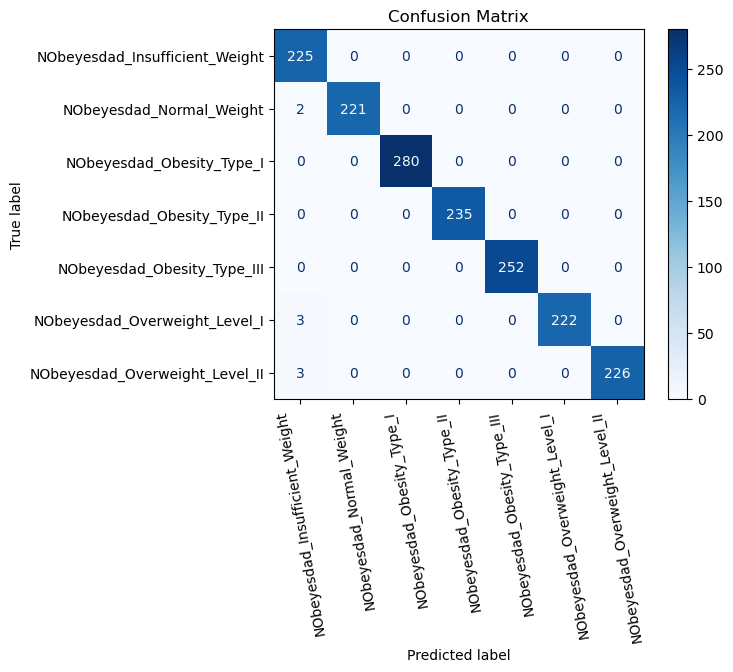

In [91]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II'])

# Plotting the confusion matrix
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=100)    
plt.show()

In [92]:
y_test_single = np.argmax(y_test, axis=1)
y_rfc_test_predict_single = np.argmax(y_rfc_test_predict, axis=1)

In [93]:
cm1=confusion_matrix(y_test_single,y_rfc_test_predict_single)
print(cm1)

[[42  0  0  0  0  0  0]
 [ 9 49  0  0  0  0  1]
 [ 3  0 68  0  0  0  0]
 [ 2  0  0 60  0  0  0]
 [ 1  0  0  0 71  0  0]
 [ 8  0  0  0  0 43  0]
 [ 4  0  0  0  0  0 57]]


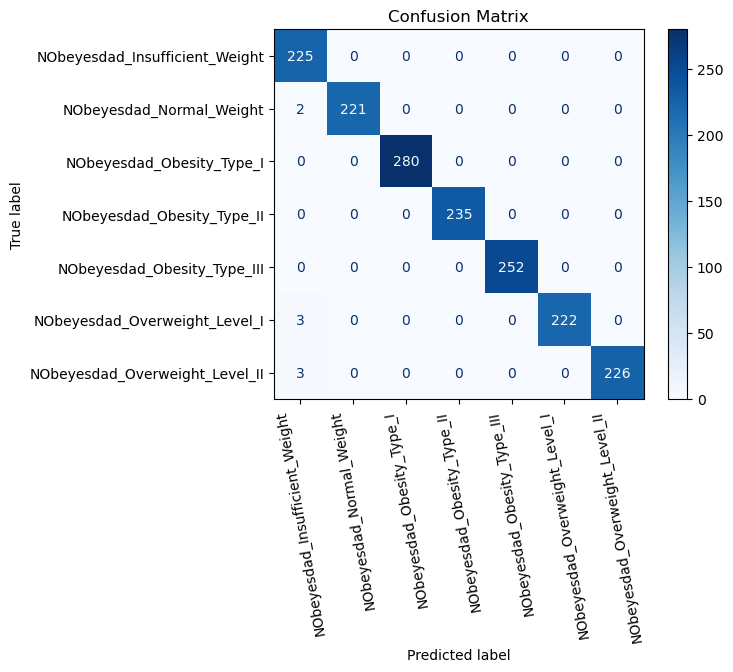

In [94]:
display1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II'])

# Plotting the confusion matrix
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=100)    
plt.show()

**2. LOGISTIC REGRESSION MODEL**

In [96]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(X_train, y_train_single)

LogisticRegression()

In [97]:
#Making predictions
y_lreg_train_predict=lreg.predict(X_train)
y_lreg_test_predict=lreg.predict(X_test)

In [98]:
#Evaluating performance
print(classification_report(y_train_single,y_lreg_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       225
           1       0.77      0.57      0.65       223
           2       0.81      0.79      0.80       280
           3       0.85      0.99      0.91       235
           4       0.96      1.00      0.98       252
           5       0.72      0.71      0.72       225
           6       0.72      0.65      0.68       229

    accuracy                           0.82      1669
   macro avg       0.81      0.81      0.81      1669
weighted avg       0.81      0.82      0.81      1669



In [99]:
y_test_single = np.argmax(y_test, axis=1)

In [100]:
print(classification_report(y_test_single,y_lreg_test_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        42
           1       0.78      0.54      0.64        59
           2       0.73      0.75      0.74        71
           3       0.80      0.95      0.87        62
           4       0.97      0.99      0.98        72
           5       0.63      0.61      0.62        51
           6       0.58      0.56      0.57        61

    accuracy                           0.77       418
   macro avg       0.76      0.77      0.76       418
weighted avg       0.77      0.77      0.76       418



In [101]:
print(confusion_matrix(y_train_single,y_lreg_train_predict))

[[222   3   0   0   0   0   0]
 [ 44 127   0   0   0  31  21]
 [  0   0 222  37   6   5  10]
 [  0   0   2 232   1   0   0]
 [  0   0   1   0 251   0   0]
 [  0  27  12   0   0 160  26]
 [  0   8  38   5   4  26 148]]


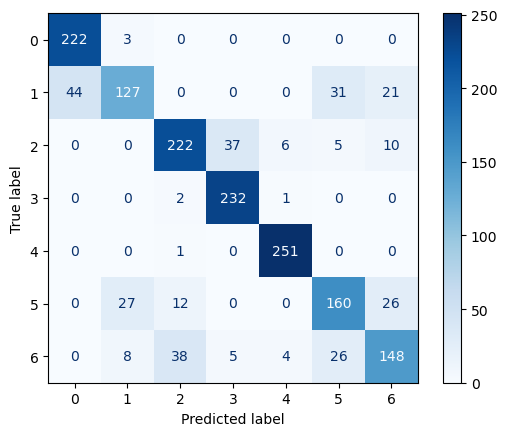

In [102]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_train_single,y_lreg_train_predict))
c_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [103]:
print(confusion_matrix(y_test_single,y_lreg_test_predict))

[[42  0  0  0  0  0  0]
 [ 7 32  0  0  0 11  9]
 [ 0  1 53 10  2  2  3]
 [ 0  1  2 59  0  0  0]
 [ 0  0  0  1 71  0  0]
 [ 0  2  5  0  0 31 13]
 [ 0  5 13  4  0  5 34]]


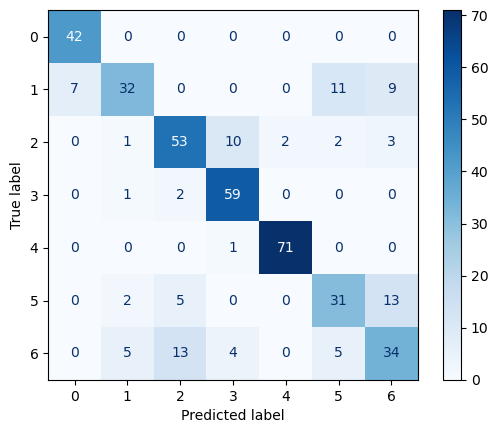

In [104]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test_single,y_lreg_test_predict))
c_matrix.plot(cmap=plt.cm.Blues)
plt.show()

**3. DECISION TREES**

In [106]:
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier(random_state=101)

In [107]:
tc

DecisionTreeClassifier(random_state=101)

In [108]:
tc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [109]:
#Applying predictions to the model
y_tc_train_predict=tc.predict(X_train)
y_tc_test_predict=tc.predict(X_test)

In [110]:
y_tc_train_predict

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [111]:
#Classification reports
print(classification_report(y_train,y_tc_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       280
           3       1.00      1.00      1.00       235
           4       1.00      1.00      1.00       252
           5       1.00      1.00      1.00       225
           6       1.00      1.00      1.00       229

   micro avg       1.00      1.00      1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669
 samples avg       1.00      1.00      1.00      1669



In [112]:
print(classification_report(y_test,y_tc_test_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       0.98      0.95      0.97        59
           2       1.00      0.94      0.97        71
           3       0.95      0.98      0.97        62
           4       0.96      0.99      0.97        72
           5       0.90      0.90      0.90        51
           6       0.93      0.93      0.93        61

   micro avg       0.96      0.96      0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418
 samples avg       0.96      0.96      0.96       418



**4. SUPPORT VECTOR MACHINES**

In [114]:
from sklearn.svm import SVC
classifier=SVC(random_state=101)

In [115]:
classifier.fit(X_train,y_train_single)

SVC(random_state=101)

In [116]:
#Applying model to make predictions
y_svc_train_predict=classifier.predict(X_train)
y_svc_test_predict=classifier.predict(X_test)

In [117]:
#Evaluating performance
print(classification_report(y_train_single,y_svc_train_predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       225
           1       0.77      0.78      0.78       223
           2       0.84      0.84      0.84       280
           3       0.89      0.99      0.94       235
           4       0.99      1.00      0.99       252
           5       0.81      0.78      0.79       225
           6       0.80      0.70      0.75       229

    accuracy                           0.86      1669
   macro avg       0.86      0.86      0.86      1669
weighted avg       0.86      0.86      0.86      1669



In [118]:
print(classification_report(y_test_single,y_svc_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.75      0.73      0.74        59
           2       0.77      0.77      0.77        71
           3       0.87      0.95      0.91        62
           4       0.99      0.99      0.99        72
           5       0.84      0.75      0.79        51
           6       0.70      0.70      0.70        61

    accuracy                           0.84       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.84      0.84      0.84       418



**5.XGBoost**

In [120]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [121]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:

xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
#Making predictions
y_xgb_train_predict=xgb.predict(X_train)
y_xgb_test_predict=xgb.predict(X_test)

In [124]:
#Evaluating performance
print(classification_report(y_train,y_xgb_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       280
           3       1.00      1.00      1.00       235
           4       1.00      1.00      1.00       252
           5       1.00      1.00      1.00       225
           6       1.00      1.00      1.00       229

   micro avg       1.00      1.00      1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669
 samples avg       1.00      1.00      1.00      1669



In [125]:
print(classification_report(y_test,y_xgb_test_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      1.00      0.99        59
           2       1.00      1.00      1.00        71
           3       0.97      0.98      0.98        62
           4       1.00      1.00      1.00        72
           5       0.98      0.96      0.97        51
           6       0.97      1.00      0.98        61

   micro avg       0.98      0.99      0.99       418
   macro avg       0.98      0.99      0.99       418
weighted avg       0.98      0.99      0.99       418
 samples avg       0.98      0.99      0.99       418



In [126]:
y_xgb_train_predict_single=np.argmax(y_xgb_train_predict,axis=1)

In [127]:
print(confusion_matrix(y_train_single,y_xgb_train_predict_single))


[[225   0   0   0   0   0   0]
 [  0 223   0   0   0   0   0]
 [  0   0 280   0   0   0   0]
 [  0   0   0 235   0   0   0]
 [  0   0   0   0 252   0   0]
 [  0   0   0   0   0 225   0]
 [  0   0   0   0   0   0 229]]


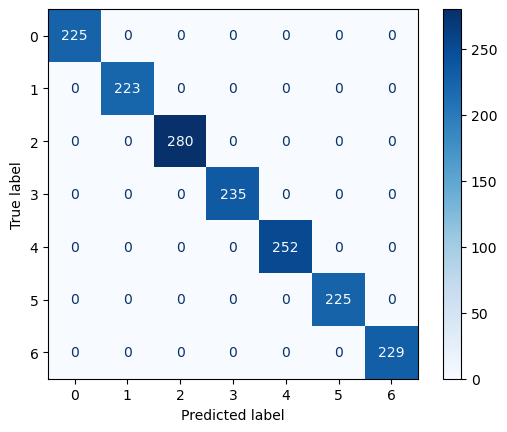

In [128]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_train_single,y_xgb_train_predict_single))
c_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [129]:
y_xgb_test_predict_single=np.argmax(y_xgb_test_predict,axis=1)

In [130]:
print(confusion_matrix(y_test_single, y_xgb_test_predict_single))

[[42  0  0  0  0  0  0]
 [ 1 58  0  0  0  0  0]
 [ 0  0 71  0  0  0  0]
 [ 1  0  0 61  0  0  0]
 [ 0  0  0  1 71  0  0]
 [ 0  1  0  0  0 49  1]
 [ 0  0  0  0  0  0 61]]


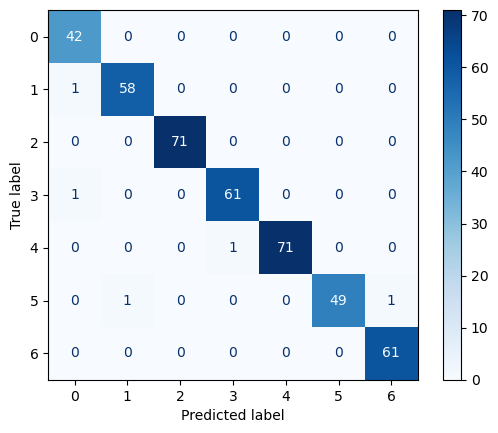

In [131]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test_single, y_xgb_test_predict_single))
c_matrix.plot(cmap=plt.cm.Blues)
plt.show()

**6. KNEIGHBORS MODEL**

In [133]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [134]:
#Making predictions
y_kn_train_predict=kn.predict(X_train)
y_kn_test_predict=kn.predict(X_test)

In [135]:
#Evaluating performance of the model
print(classification_report(y_train,y_kn_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       225
           1       0.80      0.55      0.65       223
           2       0.91      0.87      0.89       280
           3       0.95      0.97      0.96       235
           4       0.98      1.00      0.99       252
           5       0.87      0.73      0.79       225
           6       0.88      0.77      0.82       229

   micro avg       0.90      0.84      0.87      1669
   macro avg       0.90      0.83      0.86      1669
weighted avg       0.90      0.84      0.86      1669
 samples avg       0.84      0.84      0.84      1669



In [136]:
print(classification_report(y_test,y_kn_test_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        42
           1       0.62      0.39      0.48        59
           2       0.83      0.77      0.80        71
           3       0.92      0.92      0.92        62
           4       1.00      0.99      0.99        72
           5       0.81      0.67      0.73        51
           6       0.68      0.69      0.68        61

   micro avg       0.83      0.77      0.80       418
   macro avg       0.81      0.76      0.78       418
weighted avg       0.82      0.77      0.79       418
 samples avg       0.77      0.77      0.77       418



In [137]:
y_kn_train_predict_single=np.argmax(y_kn_train_predict,axis=1)

In [138]:
print(confusion_matrix(y_train_single,y_kn_train_predict_single))

[[213   8   0   0   0   3   1]
 [ 68 123   6   1   0  12  13]
 [ 19   4 244   6   2   0   5]
 [  3   0   1 228   1   0   2]
 [  0   0   0   0 251   0   1]
 [ 34  11  12   1   0 164   3]
 [ 27   7   5   3   1   9 177]]


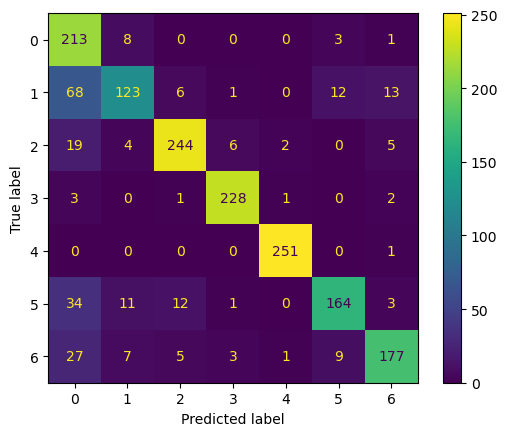

In [139]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_train_single,y_kn_train_predict_single))
c_matrix.plot(cmap='viridis')
plt.show()

In [140]:
y_kn_test_predict_single=np.argmax(y_kn_test_predict,axis=1)

In [141]:
print(confusion_matrix(y_test_single,y_kn_test_predict_single))

[[38  4  0  0  0  0  0]
 [18 23  3  0  0  5 10]
 [ 4  2 55  4  0  1  5]
 [ 0  1  1 57  0  0  3]
 [ 0  1  0  0 71  0  0]
 [ 9  1  5  0  0 34  2]
 [ 9  5  2  1  0  2 42]]


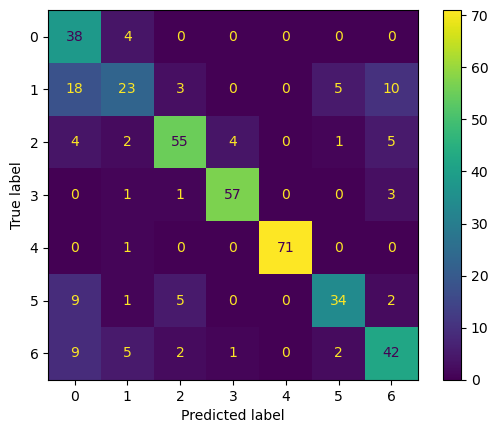

In [142]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test_single,y_kn_test_predict_single))
c_matrix.plot(cmap='viridis')
plt.show()